# Data Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('./resturant.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         43942 non-null  object 
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  float64
 13  reviews_list    

In [4]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600.0,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,2000.0,[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


# Data Cleaning

## Making Copy of data

In [5]:
cleaningDf = df.copy()

## Cleaning 'name' column

In [6]:
import re

In [7]:
def cleanName(data):
    return ''.join(re.findall(r'[A-Za-z0-9\s-]',str(data)))

In [8]:
cleaningDf['name'] = cleaningDf['name'].apply(cleanName)

## Filling NaN values in 'location' column

In [9]:
uniqueLoc = cleaningDf['location'].unique()
uniqueLoc

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [10]:
ind = cleaningDf[cleaningDf['location'].isna()].index
for x in ind:
    location='No Info Available'
#     print(cleaningDf.loc[x]['address'].split(','))
    for y in cleaningDf.loc[x]['address'].split(','):
        if y.strip() in uniqueLoc:
            location = y.strip()
            break
    cleaningDf.at[x,'location'] = location
cleaningDf[['address','location']].loc[ind]

,address,location
1662,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Bommanahalli
9874,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Bommanahalli
13693,"Chandapura- Anakal Main Road, Oppsite Vemana H...",Electronic City
16351,"Kudlu Gate, Bommanahalli, Bangalore",Bommanahalli
26432,"IB Road, Lorry Stand, Kushaal Nagar, Ward 10, ...",Kalyan Nagar
26519,"Koramangala 8th Block, Bangalore",Koramangala 8th Block
27672,"6, Kathalipalya Village, 6th Cross, Koramangal...",Koramangala 6th Block
28611,"6, Kathalipalya Village, 6th Cross, Koramangal...",Koramangala 6th Block
29298,"Koramangala 8th Block, Bangalore",Koramangala 8th Block
30604,"6, Kathalipalya Village, 6th Cross, Koramangal...",Koramangala 6th Block


In [11]:
cleaningDf.at[46609,'location'] = cleaningDf[['address','location']].loc[46609]['address'].split(',')[-2]
cleaningDf[['address','location']].loc[ind]

,address,location
1662,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Bommanahalli
9874,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Bommanahalli
13693,"Chandapura- Anakal Main Road, Oppsite Vemana H...",Electronic City
16351,"Kudlu Gate, Bommanahalli, Bangalore",Bommanahalli
26432,"IB Road, Lorry Stand, Kushaal Nagar, Ward 10, ...",Kalyan Nagar
26519,"Koramangala 8th Block, Bangalore",Koramangala 8th Block
27672,"6, Kathalipalya Village, 6th Cross, Koramangal...",Koramangala 6th Block
28611,"6, Kathalipalya Village, 6th Cross, Koramangal...",Koramangala 6th Block
29298,"Koramangala 8th Block, Bangalore",Koramangala 8th Block
30604,"6, Kathalipalya Village, 6th Cross, Koramangal...",Koramangala 6th Block


In [12]:
del ind,uniqueLoc,location

## Removing Unnecessary Columns

In [13]:
columnLst = cleaningDf.columns
columnLst

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [14]:
cleaningDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         43942 non-null  object 
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51717 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  float64
 13  reviews_list    

In [15]:
cleaningDf.drop([
    columnLst[0],
    columnLst[1],
    columnLst[7],
    columnLst[13],
    columnLst[14],
    columnLst[16]
], axis=1, inplace=True)
cleaningDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         43942 non-null  object 
 4   votes                        51717 non-null  int64  
 5   location                     51717 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   dish_liked                   23639 non-null  object 
 8   cuisines                     51672 non-null  object 
 9   approx_cost(for two people)  51371 non-null  float64
 10  listed_in(type)              51717 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


## Cleaning 'rate' column

In [16]:
def cleanRate(data):
    rateStr = str(data).split('/')[0].strip()
    if rateStr.replace('.','').isdigit():
        return float(rateStr)
    else:
        return np.nan


In [17]:
cleaningDf['rate']=cleaningDf['rate'].apply(cleanRate)
del cleanRate

## Filling NaN values in 'rate' column

In [18]:
uniqueLoc = cleaningDf['location'].unique()
uniqueLoc

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan Bhima

In [19]:
locGroupedMean = cleaningDf.groupby('location').agg({'rate':'mean'})
locGroupedMean

,rate
location,
Govindaraja Nagar,NaN
BTM,3.573740
Banashankari,3.649866
Banaswadi,3.496042
Bannerghatta Road,3.507449
...,...
West Bangalore,3.366667
Whitefield,3.621618
Wilson Garden,3.536364


In [20]:
locGroupedMean.fillna(locGroupedMean['rate'].mean(), inplace=True)
locGroupedMean

,rate
location,
Govindaraja Nagar,3.635364
BTM,3.573740
Banashankari,3.649866
Banaswadi,3.496042
Bannerghatta Road,3.507449
...,...
West Bangalore,3.366667
Whitefield,3.621618
Wilson Garden,3.536364


In [21]:
tempDf = cleaningDf[['location','rest_type','rate']].reset_index()
tempDf['indexData'] = pd.Series(tempDf.index)
tempDf

,index,location,rest_type,rate,indexData
0,0,Banashankari,Casual Dining,4.1,0
1,1,Banashankari,Casual Dining,4.1,1
2,2,Banashankari,"Cafe, Casual Dining",3.8,2
3,3,Banashankari,Quick Bites,3.7,3
4,4,Basavanagudi,Casual Dining,3.8,4
...,...,...,...,...,...
51712,51712,Whitefield,Bar,3.6,51712
51713,51713,Whitefield,Bar,NaN,51713
51714,51714,Whitefield,Bar,NaN,51714
51715,51715,"ITPL Main Road, Whitefield",Bar,4.3,51715


In [22]:
tempDf['rest_type'] = tempDf['rest_type'].apply(
    lambda x: str(x).split(',') if type(x)!=float else np.nan
)

In [23]:
tempDf = tempDf.explode('rest_type',ignore_index=True)

In [24]:
locRestGroupedMean = tempDf.groupby(['location','rest_type'])[['rate']].mean().reset_index()

In [25]:
locRestGroupedMean

,location,rest_type,rate
0,BTM,Bakery,4.000000
1,BTM,Bar,4.290476
2,BTM,Beverage Shop,3.824000
3,BTM,Casual Dining,3.700000
4,BTM,Delivery,3.472414
...,...,...,...
1279,Yeshwantpur,Delivery,3.800000
1280,Yeshwantpur,Dessert Parlor,3.800000
1281,Yeshwantpur,Food Court,3.225000
1282,Yeshwantpur,Quick Bites,3.500000


In [26]:
locRestGroupedMean['rate'] = locRestGroupedMean['rate'].fillna(locRestGroupedMean['location'].map(locGroupedMean['rate'].to_dict()))
# locRestGroupedMean['location'].map(locGroupedMean['rate'].to_dict())

In [27]:
def fillRate(rowData):
    global locGroupedMean,locRestGroupedMean
    data = rowData.copy()
    if np.isnan(data['rate']):
        if type(data['rest_type'])==float:
            data['rate'] = locGroupedMean.loc[data['location']]['rate']
            return data
        else:
            data['rate'] = locRestGroupedMean[
                (locRestGroupedMean['location']==data['location'])
                & (locRestGroupedMean['rest_type']==data['rest_type'])
            ].reset_index().loc[0]['rate']
            return data
        
    else:
        return data

In [28]:
cleaningDf['rate'] = tempDf.apply(fillRate, axis=1)\
.groupby('index')[['rate']].mean().reset_index().sort_values(by='index')['rate']

In [29]:
cleaningDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         51717 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51717 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   dish_liked                   23639 non-null  object 
 8   cuisines                     51672 non-null  object 
 9   approx_cost(for two people)  51371 non-null  float64
 10  listed_in(type)              51717 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.3+ MB


In [30]:
del tempDf, locGroupedMean, locRestGroupedMean

## Filling NaN in 'approx_cost(for two people)' column

In [31]:
approxCostGrouped = cleaningDf.groupby('listed_in(type)')[['approx_cost(for two people)']].mean()

In [32]:
cleaningDf['approx_cost(for two people)'].fillna(cleaningDf['listed_in(type)'].map(approxCostGrouped['approx_cost(for two people)'].to_dict()),inplace=True)
cleaningDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         51717 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51717 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   dish_liked                   23639 non-null  object 
 8   cuisines                     51672 non-null  object 
 9   approx_cost(for two people)  51717 non-null  float64
 10  listed_in(type)              51717 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.3+ MB


In [33]:
del approxCostGrouped

## Filling NaN in rest of the columns

In [34]:
cleaningDf.fillna('No Info Available',inplace=True)
cleaningDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         51717 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51717 non-null  object 
 6   rest_type                    51717 non-null  object 
 7   dish_liked                   51717 non-null  object 
 8   cuisines                     51717 non-null  object 
 9   approx_cost(for two people)  51717 non-null  float64
 10  listed_in(type)              51717 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.3+ MB


In [35]:
df = cleaningDf.copy()

In [36]:
del cleaningDf

# Data Analysis

## UDF (User Defined Functions)

In [37]:
def splitData(data):
    return [x.strip() for x in str(data).split(',')]

## Resturant Class

In [38]:
def priceClassification(price):
    if (price<=200):
        return 'Economy Class'
    elif (price>200) and (price<=1000):
        return 'Mid Class'
    elif (price>1000):
        return 'High Class'
    else:
        return 'Invalid Price'

In [39]:
df['Rest_class'] = df['approx_cost(for two people)'].apply(priceClassification)
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),Rest_class
0,Jalsa,Yes,Yes,4.100,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Mid Class
1,Spice Elephant,Yes,No,4.100,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Mid Class
2,San Churro Cafe,Yes,No,3.800,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Mid Class
3,Addhuri Udupi Bhojana,No,No,3.700,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Mid Class
4,Grand Village,No,No,3.800,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Mid Class
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru,No,No,3.600,27,Whitefield,Bar,No Info Available,Continental,1500.0,Pubs and bars,High Class
51713,Vinod Bar And Restaurant,No,No,3.972,0,Whitefield,Bar,No Info Available,Finger Food,600.0,Pubs and bars,Mid Class
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.972,0,Whitefield,Bar,No Info Available,Finger Food,2000.0,Pubs and bars,High Class
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars,High Class


## Resturant Outlets

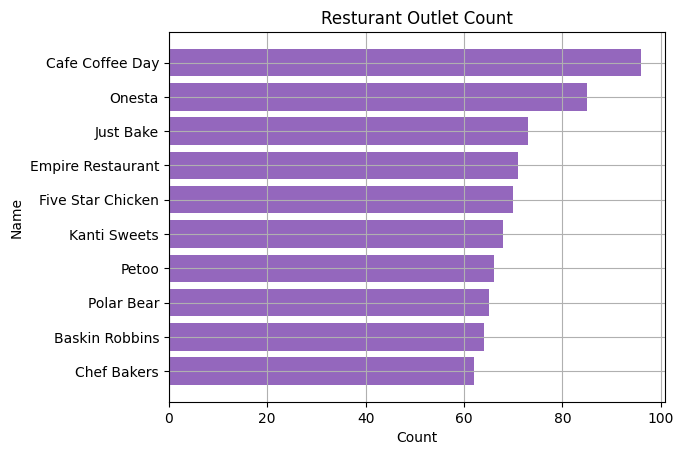

In [233]:
outlets = df.groupby('name')[['rate']].count().sort_values('rate',ascending=False).reset_index().rename(columns={'rate': 'outletCount'})
outlets = outlets[(outlets['outletCount']>1)]
plt.barh(data=outlets[:10][::-1],width='outletCount',y='name',color='tab:purple')
plt.title('Resturant Outlet Count')
plt.ylabel('Name')
plt.xlabel('Count')
plt.grid()
plt.show()

## Resturant Popularity

### 1. Highly 10 Rated Resturant

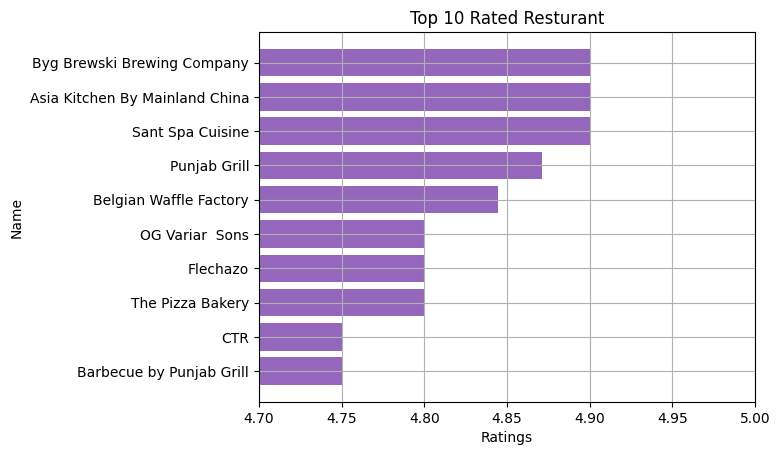

In [234]:
t10Rated = df.groupby('name')[['rate']].mean().sort_values('rate',ascending=False)[:10][::-1]
plt.barh(data=t10Rated[::],width='rate',y=t10Rated.index,color='tab:purple')
plt.title('Top 10 Rated Resturant')
plt.ylabel('Name')
plt.xlabel('Ratings')
plt.xlim([4.7,5])
plt.grid()
plt.show()

### 2. Lowest 10 Rated Resturant

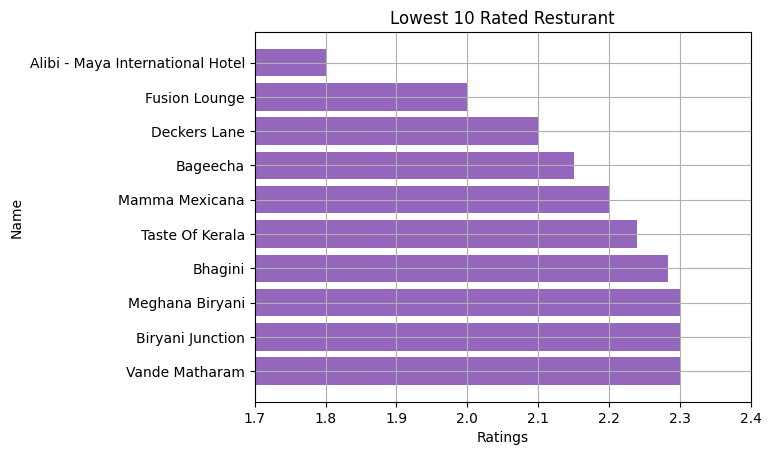

In [235]:
l10Rated = df.groupby('name')[['rate']].mean().sort_values('rate')[:10][::-1]
plt.barh(data=l10Rated,width='rate',y=l10Rated.index,color='tab:purple')
plt.title('Lowest 10 Rated Resturant')
plt.ylabel('Name')
plt.xlabel('Ratings')
plt.xlim([1.7,2.4])
plt.grid()
plt.show()

### 3. Highest 10 Voted Restaurant

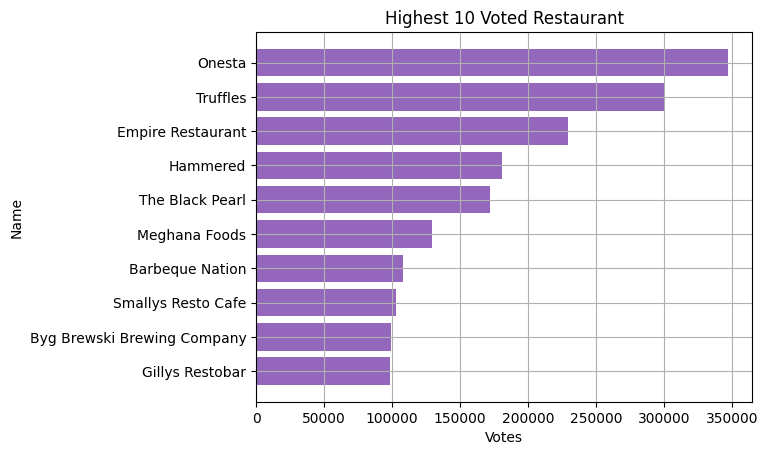

In [236]:
h10Voted = df.groupby('name')[['votes']].sum().sort_values('votes',ascending=False)[:10][::-1]
plt.barh(data=h10Voted,width='votes',y=h10Voted.index,color='tab:purple')
plt.title('Highest 10 Voted Restaurant')
plt.ylabel('Name')
plt.xlabel('Votes')
plt.grid()
plt.show()

### 4. Rating Comparision of Online and Offline Resturants

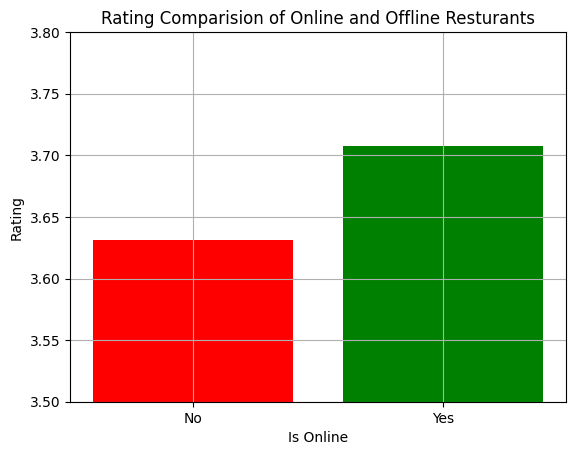

In [237]:
onlineOrderRateComparision = df.groupby('online_order')[['rate']].mean()
plt.bar(data=onlineOrderRateComparision,height='rate',x=onlineOrderRateComparision.index,color=['red','green'])
plt.title('Rating Comparision of Online and Offline Resturants')
plt.ylabel('Rating')
plt.xlabel('Is Online')
plt.ylim([3.5,3.8])
plt.grid()
plt.show()

### 5. Rating Comparision of booking and no booking type resturant

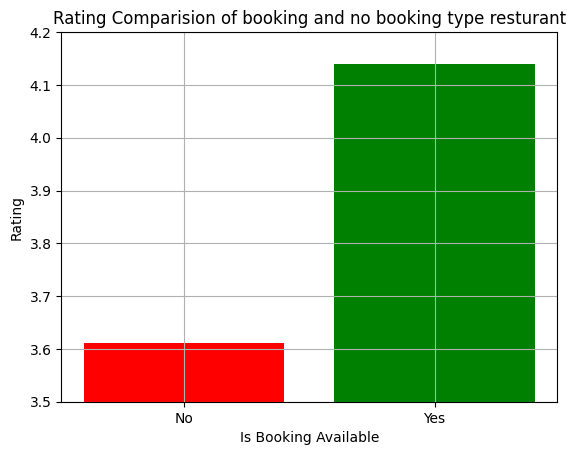

In [238]:
bookingRatingComparision = df.groupby('book_table')[['rate']].mean()
plt.bar(data=bookingRatingComparision,height='rate',x=bookingRatingComparision.index,color=['red','green'])
plt.title('Rating Comparision of booking and no booking type resturant')
plt.ylabel('Rating')
plt.xlabel('Is Booking Available')
plt.ylim([3.5,4.2])
plt.grid()
plt.show()

### 6. Votes Comparision of Online and Offline Resturants

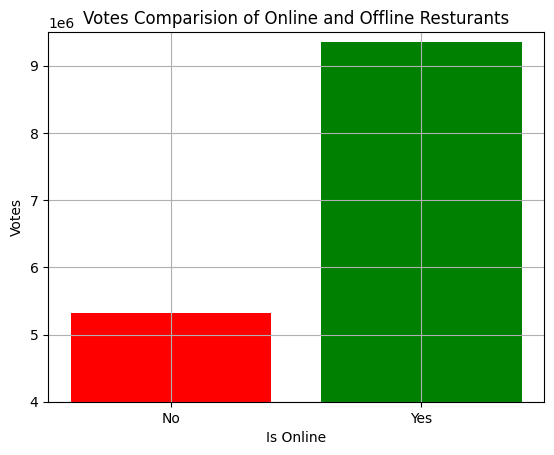

In [239]:
onlineOrderVoteComparision = df.groupby('online_order')[['votes']].sum()
plt.bar(data=onlineOrderVoteComparision,height='votes',x=onlineOrderVoteComparision.index,color=['red','green'])
plt.title('Votes Comparision of Online and Offline Resturants')
plt.ylabel('Votes')
plt.xlabel('Is Online')
plt.ylim([4*10**6,9.5*10**6])
plt.grid()
plt.show()

### 7. Votes Comparision of booking and no booking type resturant

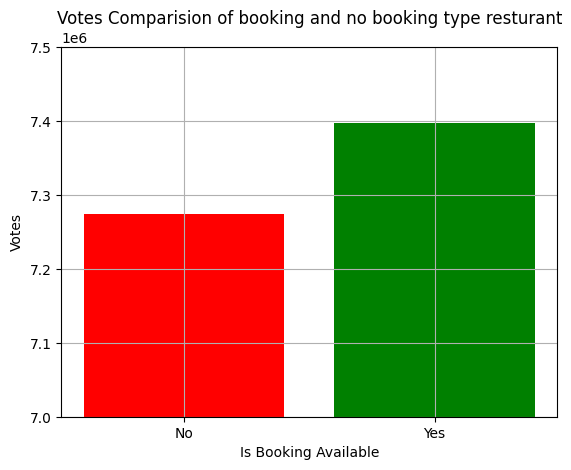

In [240]:
bookingVotesComparision = df.groupby('book_table')[['votes']].sum()
plt.bar(data=bookingVotesComparision,height='votes',x=bookingVotesComparision.index,color=['red','green'])
plt.title('Votes Comparision of booking and no booking type resturant')
plt.ylabel('Votes')
plt.xlabel('Is Booking Available')
plt.ylim([7*10**6,7.5*10**6])
plt.grid()
plt.show()

### 8. Popular Rated Resturant with Respect to Resturant Class

In [48]:
popRateRestClass = df.groupby(['name','Rest_class'])[['rate']].mean().sort_values('rate',ascending=False).reset_index()
popRateRestClass = popRateRestClass[(popRateRestClass['rate']>=4.0)]
popRateRestClass

,name,Rest_class,rate
0,Asia Kitchen By Mainland China,High Class,4.900000
1,Byg Brewski Brewing Company,High Class,4.900000
2,Sant Spa Cuisine,Mid Class,4.900000
3,Punjab Grill,High Class,4.871429
4,Belgian Waffle Factory,Mid Class,4.844828
...,...,...,...
1332,The Underpass Pub Grub,High Class,4.000000
1333,Bobs Restaurant,Mid Class,4.000000
1334,The Terminus - The Oterra,High Class,4.000000
1335,Blue Bar - The Taj West End,High Class,4.000000


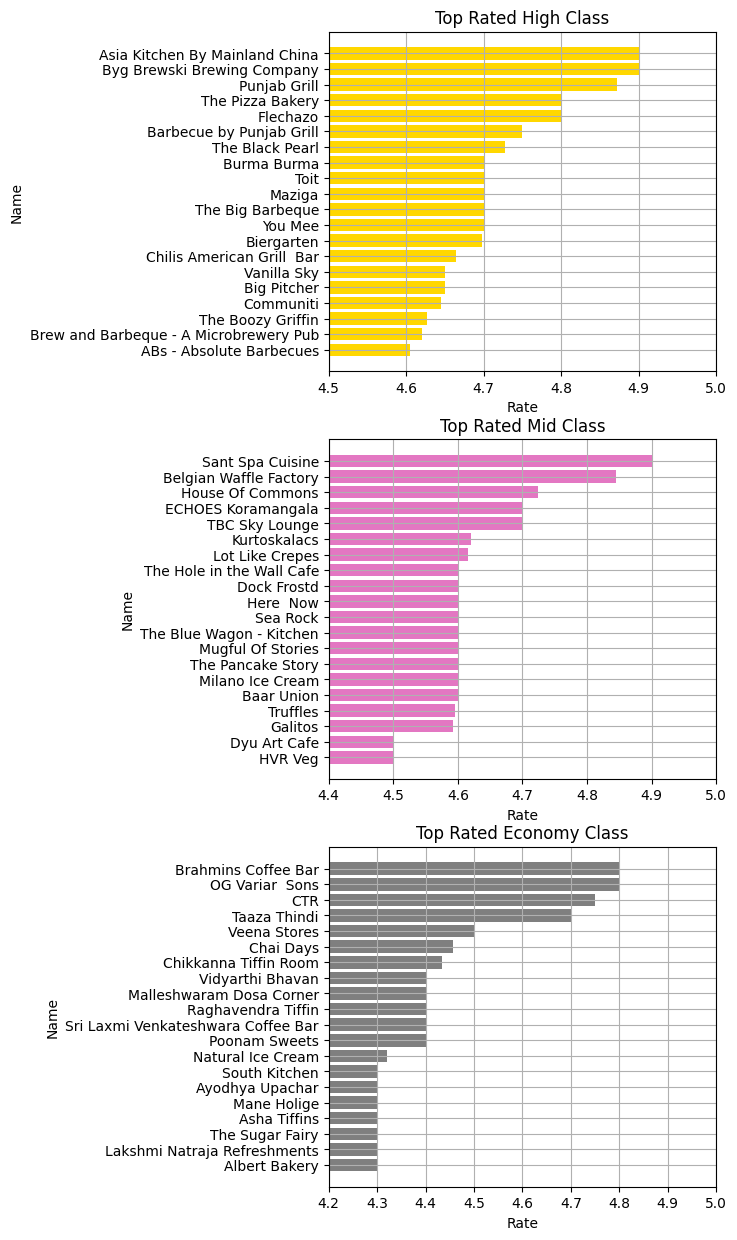

In [229]:
highClassPop = popRateRestClass[popRateRestClass['Rest_class']=='High Class'][:20].sort_values('rate',ascending=False)[::-1]
midClassPop = popRateRestClass[popRateRestClass['Rest_class']=='Mid Class'][:20].sort_values('rate',ascending=False)[::-1]
ecoClassPop = popRateRestClass[popRateRestClass['Rest_class']=='Economy Class'][:20].sort_values('rate',ascending=False)[::-1]

plt.figure(figsize=(5,15))

ax1 = plt.subplot(3,1,1)
ax1.barh(data = highClassPop, y='name', width='rate',color='gold')
ax1.set_title('Top Rated High Class')
ax1.set_ylabel('Name')
ax1.set_xlabel('Rate')
ax1.set_xlim([4.5,5])
ax1.grid()

ax2 = plt.subplot(3,1,2)
ax2.barh(data = midClassPop, y='name', width='rate',color='tab:pink')
ax2.set_title('Top Rated Mid Class')
ax2.set_ylabel('Name')
ax2.set_xlabel('Rate')
ax2.set_xlim([4.4,5])
ax2.grid()

ax3 = plt.subplot(3,1,3)
ax3.barh(data = ecoClassPop, y='name', width='rate',color='tab:gray')
ax3.set_title('Top Rated Economy Class')
ax3.set_ylabel('Name')
ax3.set_xlabel('Rate')
ax3.set_xlim([4.2,5])
ax3.grid()
# plt.title("Class Based Popular Resturants")
plt.show()

## Location Analysis

### 1. Location with Highest number of resturants

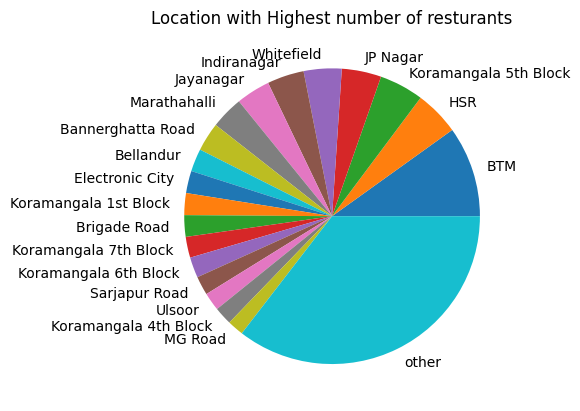

In [195]:
numRest = df.groupby('location')[['name']].count().sort_values('name',ascending=False).reset_index()
highNumRest10 = numRest[:19]
restNumRest = pd.DataFrame({'location':['other',],'name':[numRest[19:]['name'].sum(),]})
highNumRest = pd.concat([highNumRest10,restNumRest])
plt.pie(data=highNumRest,x='name', labels='location')
plt.title('Location with Highest number of resturants')
plt.show()

### 2. Online Order Available with respect to location

In [51]:
numOnlineOrdAvail = df[df['online_order']=='Yes'].groupby('location')[['name']].count().sort_values('name',ascending=False)
numOnlineOrdAvail

,name
location,
BTM,3332
HSR,1920
Koramangala 5th Block,1614
Jayanagar,1364
Indiranagar,1335
...,...
Hebbal,4
Central Bangalore,3
Rajarajeshwari Nagar,2


### 3. Only Offline Order Available with respect to location

In [52]:
onlyOfflineOrdAvail = df[df['online_order']=='No'].groupby('location')[['name']].count().sort_values('name',ascending=False)
onlyOfflineOrdAvail

,name
location,
BTM,1792
Whitefield,1005
JP Nagar,917
Koramangala 5th Block,890
Indiranagar,748
...,...
Kanakapura Road,2
Kengeri,2
Peenya,1


### 4. Number of resturant catagory with respect ot location

In [53]:
df.groupby(['location','listed_in(type)'])[['name']].count().sort_values('name',ascending=False)

name
location    listed_in(type)         
BTM         Delivery            3095
HSR         Delivery            1716
BTM         Dine-out            1678
JP Nagar    Delivery            1160
Indiranagar Delivery            1118
...                              ...
Sankey Road Desserts               1
            Pubs and bars          1
Vijay Nagar Desserts               1
            Drinks & nightlife     1
Yeshwantpur Pubs and bars          1

[477 rows x 1 columns]

## Resturant Catagory

### 1. Top Catagories in Banglore

In [54]:
topCatgory = df.groupby('listed_in(type)')[['name']].count().sort_values('name',ascending = False)
topCatgory

,name
listed_in(type),
Delivery,25942
Dine-out,17779
Desserts,3593
Cafes,1723
Drinks & nightlife,1101
Buffet,882
Pubs and bars,697


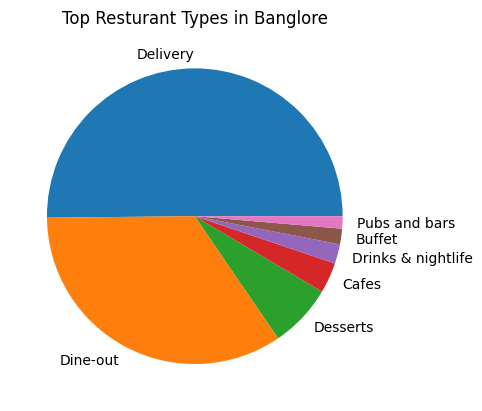

In [210]:
plt.pie(data=topCatgory, x='name',labels=topCatgory.index)
plt.title('Top Resturant Types in Banglore')
plt.show()

## Cuisine analysis

### 1. Most Served Cuisine in resturants

In [55]:
cuisineDf = df[['location','cuisines','name','online_order','listed_in(type)','approx_cost(for two people)']].copy()
cuisineDf['cuisines'] = cuisineDf['cuisines'].apply(splitData)
cuisineDf = cuisineDf.explode('cuisines',ignore_index=True)

In [56]:
mostLikedCuisine = cuisineDf.groupby('cuisines')[['name']].count().sort_values('name',ascending=False)
mostLikedCuisine

,name
cuisines,
North Indian,21085
Chinese,15547
South Indian,8644
Fast Food,8096
Biryani,6492
...,...
Raw Meats,4
Pan Asian,3
Hot dogs,3


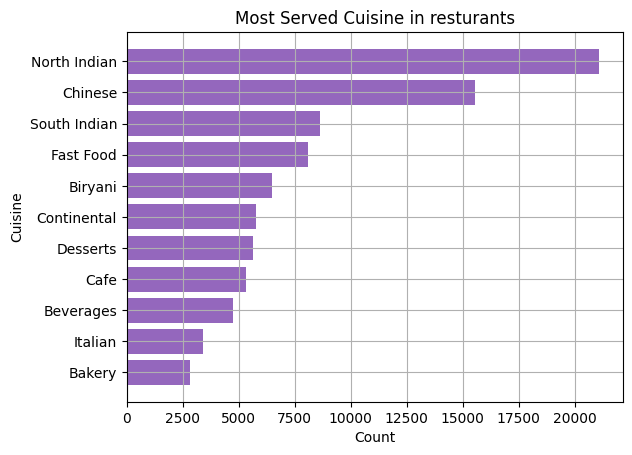

In [326]:
plt.barh(data=mostLikedCuisine[10::-1],width='name',y=mostLikedCuisine[10::-1].index,color='tab:purple')
plt.title('Most Served Cuisine in resturants')
plt.ylabel('Cuisine')
plt.xlabel('Count')
plt.grid()
plt.show()

### 2. Number of Resturant online order with respect to cuisine

In [243]:
onlineOrderedCuisine = cuisineDf[cuisineDf['online_order']=='Yes'].groupby('cuisines')[['name']].count().sort_values('name',ascending=False)
onlineOrderedCuisine

,name
cuisines,
North Indian,12418
Chinese,9513
Fast Food,5064
South Indian,4302
Biryani,4199
...,...
Indian,2
Grill,2
Pan Asian,1


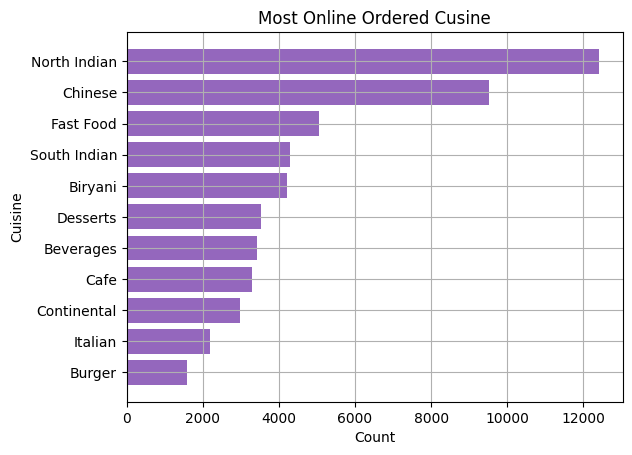

In [246]:
plt.barh(data=onlineOrderedCuisine[10::-1],width='name',y=onlineOrderedCuisine[10::-1].index,color='tab:purple')
plt.title('Most Online Ordered Cusine')
plt.ylabel('Cuisine')
plt.xlabel('Count')
plt.grid()
plt.show()

### 3. Most expensive cuisine with respect to resturant catagory

In [245]:
mostCostlyCat = cuisineDf.groupby(['cuisines','listed_in(type)'])[['approx_cost(for two people)']].mean()\
.sort_values('approx_cost(for two people)',ascending=False).reset_index()
mostCostlyCat

,cuisines,listed_in(type),approx_cost(for two people)
0,Cantonese,Dine-out,2800.000000
1,French,Drinks & nightlife,2500.000000
2,Spanish,Drinks & nightlife,2466.666667
3,Vietnamese,Drinks & nightlife,2400.000000
4,Korean,Drinks & nightlife,2178.571429
...,...,...,...
493,Paan,Desserts,100.000000
494,Drinks Only,Delivery,100.000000
495,Paan,Delivery,100.000000
496,Drinks Only,Cafes,100.000000


### 4. Most Served Cuisine in location

In [59]:
numOfServedCuisineLoc = cuisineDf[(cuisineDf['cuisines']!='No Info Available')]\
.groupby(['location','cuisines'])[['name']].count().reset_index()
numOfServedCuisineLocMax = numOfServedCuisineLoc.groupby('location')[['name']].max()

def getMostServedCusineLoc(rowData):
    global numOfServedCuisineLocMax
    loc = rowData['location']
    nameCount = rowData['name']
    if (numOfServedCuisineLocMax.loc[loc]['name']==nameCount):
        return True
    else:
        return False
    
numOfServedCuisineLoc = numOfServedCuisineLoc[numOfServedCuisineLoc.apply(getMostServedCusineLoc,axis=1)]
numOfServedCuisineLoc

,location,cuisines,name
41,BTM,North Indian,2469
89,Banashankari,North Indian,309
113,Banaswadi,Chinese,254
181,Bannerghatta Road,North Indian,701
227,Basavanagudi,South Indian,218
...,...,...,...
2837,West Bangalore,Biryani,4
2897,Whitefield,North Indian,1059
2932,Wilson Garden,North Indian,132
2943,Yelahanka,South Indian,4


In [60]:
pd.Series({str(y):x for x,y in enumerate('abcdefgh')})

a    0
b    1
c    2
d    3
e    4
f    5
g    6
h    7
dtype: int64

## Resturant Prices

### 1. Top 10 Expensive Resturant

In [61]:
t10ExpRest = df.groupby('name')[['approx_cost(for two people)']].mean()\
.sort_values('approx_cost(for two people)',ascending=False)[:10]
t10ExpRest

,approx_cost(for two people)
name,
Le Cirque Signature - The Leela Palace,6000.0
Royal Afghan - ITC Windsor,5000.0
Malties - Radisson Blu,4500.0
La Brasserie - Le Meridien,4100.0
Dum Pukht Jolly Nabobs - ITC Windsor,4000.0
Dakshin - ITC Windsor,4000.0
Edo Restaurant Bar - ITC Gardenia,4000.0
Alba - JW Marriott Bengaluru,4000.0
Jamavar - The Leela Palace,4000.0


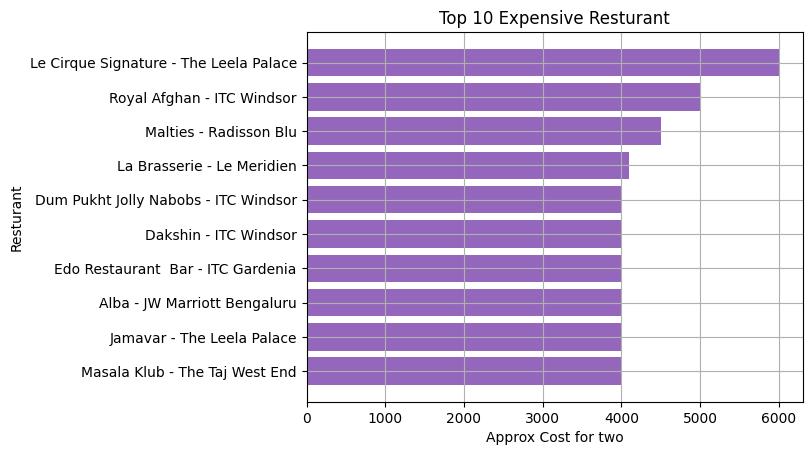

In [249]:
plt.barh(data=t10ExpRest[10::-1],width='approx_cost(for two people)',y=t10ExpRest[10::-1].index,color='tab:purple')
plt.title('Top 10 Expensive Resturant')
plt.ylabel('Resturant')
plt.xlabel('Approx Cost for two')
plt.grid()
plt.show()

### 2. Top Cheapest Resturant

In [62]:
t10CheapRest = df.groupby('name')[['approx_cost(for two people)']].mean()\
.sort_values('approx_cost(for two people)')[:10]
t10CheapRest

,approx_cost(for two people)
name,
Srinidhi Sagar Deluxe,40.000000
Bread Better,50.000000
Funky Food,60.000000
Namaste,70.000000
Nellore Dosa Camp,70.000000
Savera Cafe,71.428571
Dtink Lab,80.000000
Dosa Cafe,80.000000
Shree Ganesh Fruit Juice Centre,90.000000


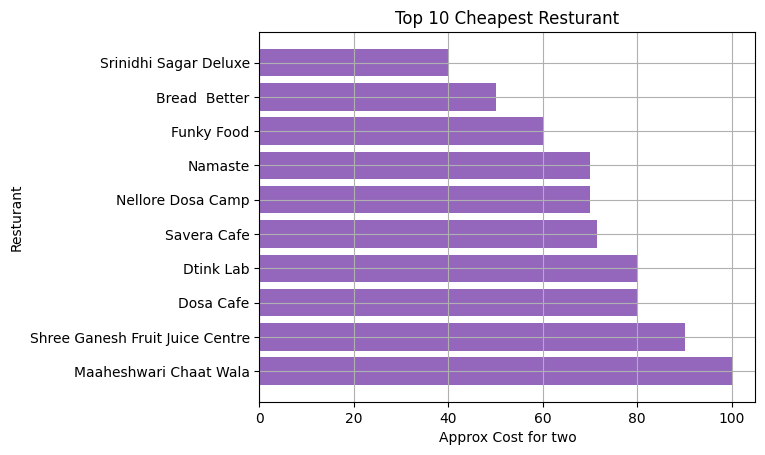

In [250]:
plt.barh(data=t10CheapRest[10::-1],width='approx_cost(for two people)',y=t10CheapRest[10::-1].index,color='tab:purple')
plt.title('Top 10 Cheapest Resturant')
plt.ylabel('Resturant')
plt.xlabel('Approx Cost for two')
plt.grid()
plt.show()

In [63]:
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),Rest_class
0,Jalsa,Yes,Yes,4.100,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Mid Class
1,Spice Elephant,Yes,No,4.100,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Mid Class
2,San Churro Cafe,Yes,No,3.800,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Mid Class
3,Addhuri Udupi Bhojana,No,No,3.700,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Mid Class
4,Grand Village,No,No,3.800,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Mid Class
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru,No,No,3.600,27,Whitefield,Bar,No Info Available,Continental,1500.0,Pubs and bars,High Class
51713,Vinod Bar And Restaurant,No,No,3.972,0,Whitefield,Bar,No Info Available,Finger Food,600.0,Pubs and bars,Mid Class
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.972,0,Whitefield,Bar,No Info Available,Finger Food,2000.0,Pubs and bars,High Class
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars,High Class


## Most Popular Dish

### 1. Top Liked Dishes

In [64]:
mostPopDish = df[df['dish_liked']!='No Info Available']['dish_liked'].apply(splitData)\
.explode('dish_liked').value_counts()[:100]
mostPopDish

Pasta           3409
Burgers         3024
Cocktails       2832
Pizza           2737
Biryani         2092
                ... 
Sushi            229
Faluda           227
Fish Curry       226
Chop Suey        220
Draught Beer     220
Name: dish_liked, Length: 100, dtype: int64

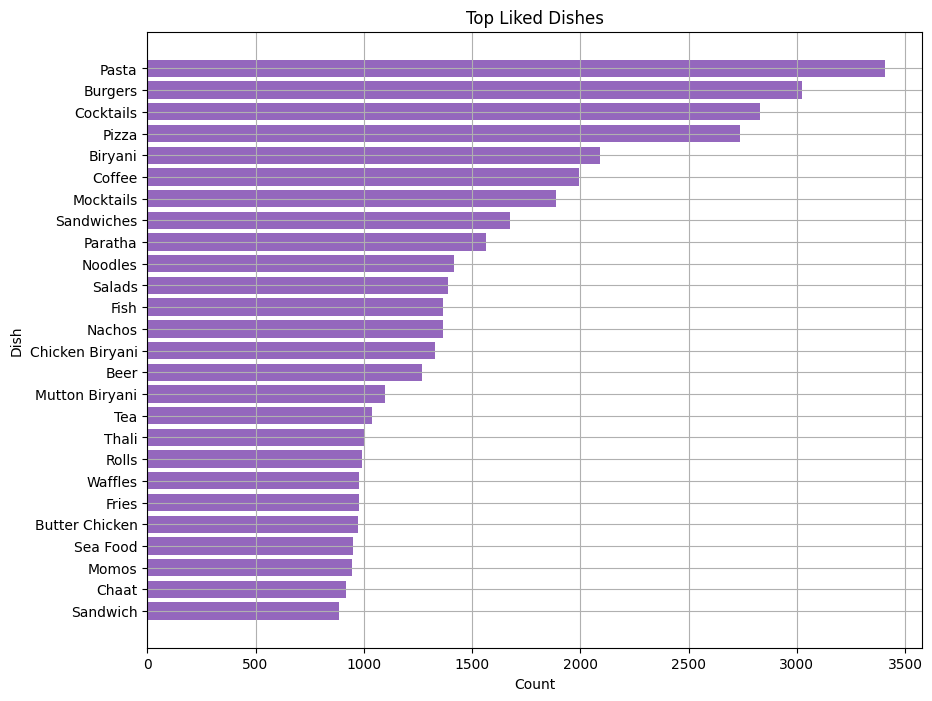

In [258]:
plt.figure(figsize=(10,8))
plt.barh(width=mostPopDish[25::-1],y=mostPopDish[25::-1].index,color='tab:purple')
plt.title('Top Liked Dishes')
plt.ylabel('Dish')
plt.xlabel('Count')
plt.grid()
plt.show()

### 2. Liked Dishes of highest rated resturant and their location

In [65]:
popRatedDish = df[(df['name'].isin(t10Rated.index)) & (df['dish_liked']!='No Info Available')][[
    'location','name','dish_liked'
]].drop_duplicates()
popRatedDish

,location,name,dish_liked
3921,Sarjapur Road,Byg Brewski Brewing Company,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch..."
5153,Brigade Road,Belgian Waffle Factory,"Coffee, Berryblast, Nachos, Chocolate Waffles,..."
6746,Whitefield,Flechazo,"Pizza, Mutton Kebab, Chicken Biryani, Sea Food..."
7118,Whitefield,Punjab Grill,"Kadai Paneer, Kulfi, Kadhai Paneer, Dahi Kebab..."
8275,Koramangala 5th Block,Asia Kitchen By Mainland China,"Noodles, Chicken Dim Sum, Pad Thai Noodle, Jum..."
9217,Koramangala 5th Block,Belgian Waffle Factory,"Nachos, Chocolate Waffles, Nutella Waffle, Sal..."
10284,Koramangala 5th Block,Belgian Waffle Factory,"Oreo Waffle, Nachos, Coffee, Chocolate Waffles..."
15364,Vasanth Nagar,Belgian Waffle Factory,"Chocolate Waffles, Nutella Waffle, Nachos, Fre..."
18185,Indiranagar,The Pizza Bakery,"Pizza, Garlic Bread, Beer, Tiramisu, Vanilla I..."
20314,Koramangala 5th Block,Asia Kitchen By Mainland China,"Chicken Dim Sum, Pad Thai Noodle, Jumbo Prawns..."


### 3. Liked Dishes of Highest Voted Resturants

In [66]:
popVotedDish = df[(df['name'].isin(h10Voted.index)) & (df['dish_liked']!='No Info Available')][['location','name','dish_liked']]\
.drop_duplicates()
popVotedDish

,location,name,dish_liked
7,Banashankari,Onesta,"Farmhouse Pizza, Chocolate Banana, Virgin Moji..."
38,Jayanagar,Empire Restaurant,"Chicken Tikka Masala, Mutton Keema Dosa, Mutto..."
86,Jayanagar,Meghana Foods,"Chicken Boneless Biryani, Hyderabadi Biryani, ..."
865,Bannerghatta Road,Empire Restaurant,"Chicken Satay, Mutton Brain, Egg Biryani, Pane..."
868,JP Nagar,Barbeque Nation,"Lunch Buffet, Goan Fish Curry, Mocktails, Chic..."
...,...,...,...
49125,HSR,Onesta,"Banana Smoothie, Tiramisu, Barbeque Chicken Pi..."
49170,Sarjapur Road,Byg Brewski Brewing Company,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C..."
50107,Whitefield,Onesta,"Margarita, Chicken Tikka, Chocolate Pizza, Pra..."
50145,"Varthur Main Road, Whitefield",Empire Restaurant,"Roti, Paratha, Tandoori Chicken, Egg Noodles"


### 4. Liked Dishes of Most Expensive Resturants

In [67]:
popExpDish = df[(df['name'].isin(t10ExpRest.index)) & (df['dish_liked']!='No Info Available')][[
    'location','name','dish_liked','approx_cost(for two people)'
]].drop_duplicates()
popExpDish

,location,name,dish_liked,approx_cost(for two people)
6104,Lavelle Road,Alba - JW Marriott Bengaluru,"Pizza, Tiramisu, Pasta, Risotto, Lobster, Pann...",4000.0
6150,Richmond Road,Edo Restaurant Bar - ITC Gardenia,"Sushi, Teriyaki Chicken, Oysters, Tiramisu, Ch...",4000.0
13071,Race Course Road,Masala Klub - The Taj West End,"Chocolate Cake, Wine, Meat Curry, Dal Makhani,...",4000.0
19121,Old Airport Road,Jamavar - The Leela Palace,"Chicken Chettinad, Vegetable Stew, Lobster, Ku...",4000.0
19139,Old Airport Road,Le Cirque Signature - The Leela Palace,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...",6000.0
37715,Sankey Road,La Brasserie - Le Meridien,"Pasta, Veg Sushi, Biryani, Lunch Buffet, Waffl...",4100.0
40266,Sankey Road,Royal Afghan - ITC Windsor,"Dal Bukhara, Chocolate Cake, Butter Chicken, N...",5000.0
40274,Sankey Road,Dakshin - ITC Windsor,"Appam, Prawn, Vegetable Stew, Fish, Banana Dos...",4000.0
40278,Sankey Road,Dum Pukht Jolly Nabobs - ITC Windsor,"Jumbo Prawns, Paratha, Shahi Tukda, Tikki, Dum...",4000.0
41591,Marathahalli,Malties - Radisson Blu,"Cocktails, Jumbo Prawns, Charcuterie Platter, ...",4500.0


### 5. Liked Dishes of Cheapest Resturants

In [68]:
popCheapDish = df[(df['name'].isin(t10CheapRest.index)) & (df['dish_liked']!='No Info Available')][[
    'location','name','dish_liked','approx_cost(for two people)'
]].drop_duplicates()
popCheapDish

,location,name,dish_liked,approx_cost(for two people)
27091,Domlur,Srinidhi Sagar Deluxe,"Idli, Coffee, Masala Dosa, Fruit Juices, Vada,...",40.0


### 6. Liked Dishes of High Class Resturant

In [69]:
popDishHighClass = df[(df['Rest_class']=='High Class') & (df['dish_liked']!='No Info Available')]['dish_liked'].\
apply(splitData).explode('dish_liked').value_counts()
popDishHighClass

Cocktails            2457
Pizza                1207
Mocktails            1189
Pasta                1046
Beer                  976
                     ... 
Seafood Pizza           1
Chicken Dry Fry         1
Crackling Spinach       1
Fried Fish              1
Cod                     1
Name: dish_liked, Length: 966, dtype: int64

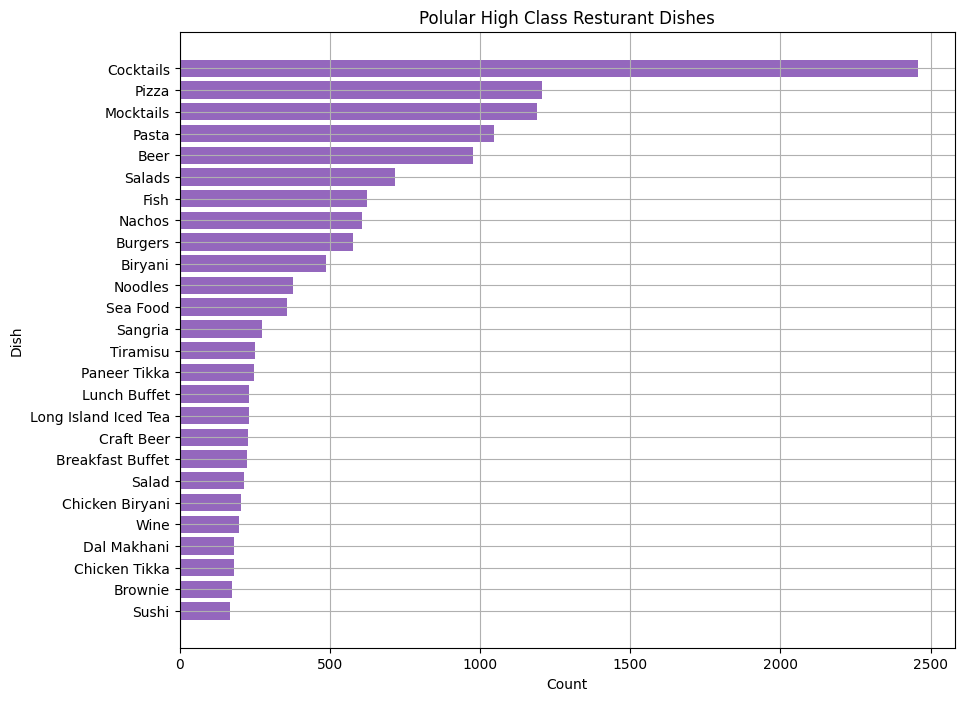

In [259]:
plt.figure(figsize=(10,8))
plt.barh(width=popDishHighClass[25::-1],y=popDishHighClass[25::-1].index,color='tab:purple')
plt.title('Polular High Class Resturant Dishes')
plt.ylabel('Dish')
plt.xlabel('Count')
plt.grid()
plt.show()

### 7. Liked Dishes of Mid Class Resturant

In [70]:
popDishMidClass = df[(df['Rest_class']=='Mid Class') & (df['dish_liked']!='No Info Available')]['dish_liked'].\
apply(splitData).explode('dish_liked').value_counts()
popDishMidClass

Burgers                2397
Pasta                  2348
Coffee                 1758
Biryani                1570
Pizza                  1524
                       ... 
Roasted Pork              1
Wasabi Ice Cream          1
Medu Vada                 1
Tex Mex                   1
Vegetable Dumplings       1
Name: dish_liked, Length: 2310, dtype: int64

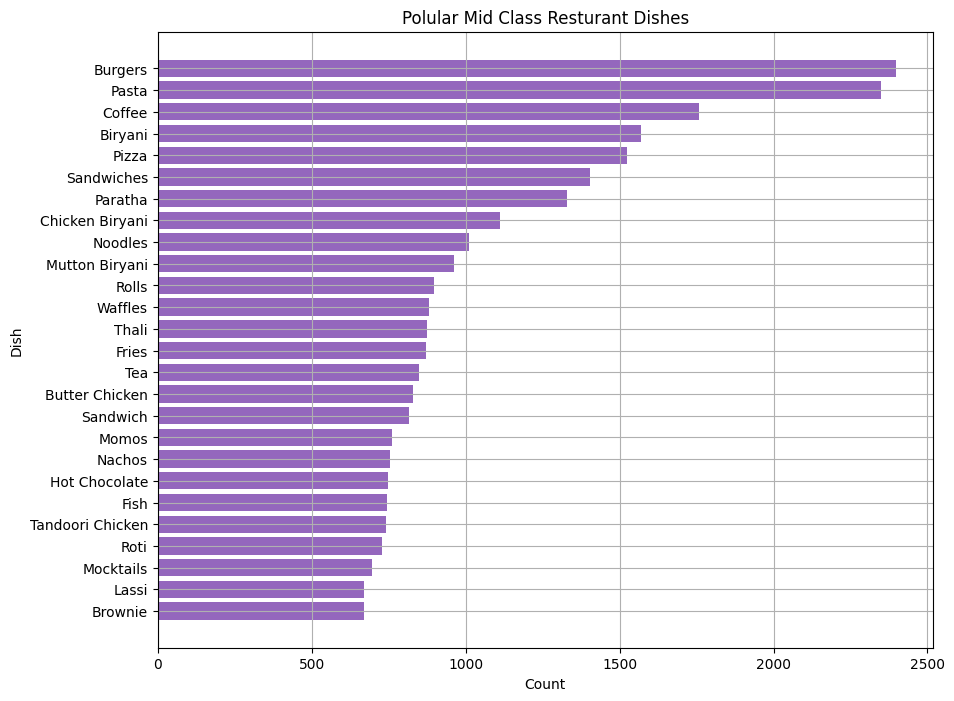

In [260]:
plt.figure(figsize=(10,8))
plt.barh(width=popDishMidClass[25::-1],y=popDishMidClass[25::-1].index,color='tab:purple')
plt.title('Polular Mid Class Resturant Dishes')
plt.ylabel('Dish')
plt.xlabel('Count')
plt.grid()
plt.show()

### 8. Liked Dishes of Economy Class Resturant

In [71]:
popDishEconomyClass = df[(df['Rest_class']=='Economy Class') & (df['dish_liked']!='No Info Available')]['dish_liked'].\
apply(splitData).explode('dish_liked').value_counts()
popDishEconomyClass

Filter Coffee     183
Masala Dosa       165
Panipuri          155
Chaat             153
Samosa            149
                 ... 
Punjabi Lassi       1
Patiyala Lassi      1
Chaap               1
Egg Noodles         1
Kothu Parotta       1
Name: dish_liked, Length: 474, dtype: int64

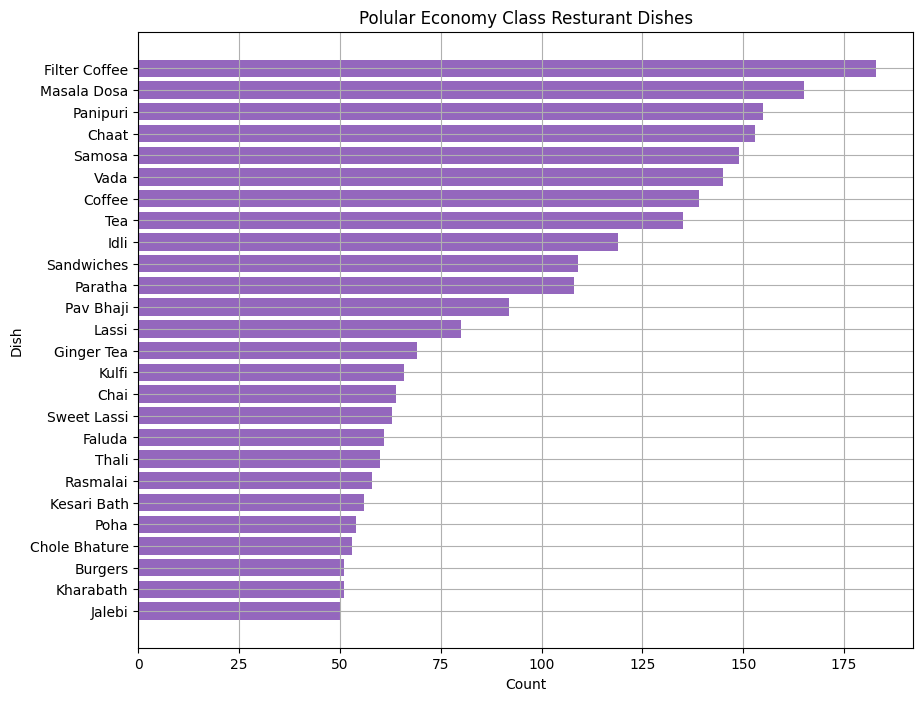

In [261]:
plt.figure(figsize=(10,8))
plt.barh(width=popDishEconomyClass[25::-1],y=popDishEconomyClass[25::-1].index,color='tab:purple')
plt.title('Polular Economy Class Resturant Dishes')
plt.ylabel('Dish')
plt.xlabel('Count')
plt.grid()
plt.show()

## Resturant Type

### 1. Top Rated Resturant Type

In [72]:
resturantTypeRatings = df.groupby('listed_in(type)')[['rate']].mean().sort_values('rate', ascending=False)
resturantTypeRatings

,rate
listed_in(type),
Drinks & nightlife,4.015349
Pubs and bars,4.013940
Buffet,3.976160
Cafes,3.855635
Desserts,3.747102
Dine-out,3.656241
Delivery,3.634798


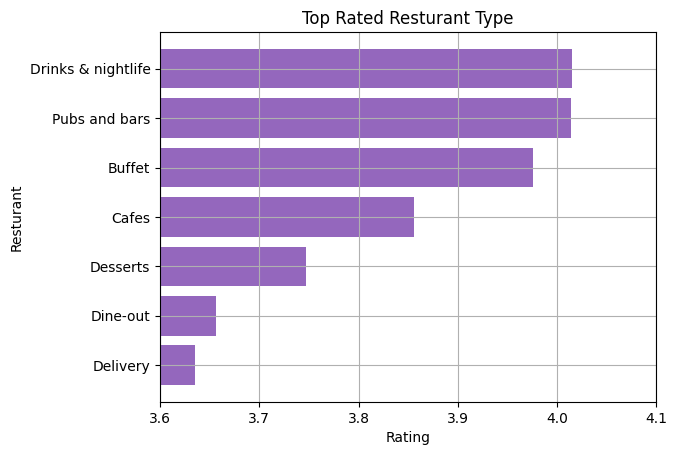

In [266]:
plt.barh(data=resturantTypeRatings[::-1],width='rate',y=resturantTypeRatings[::-1].index,color='tab:purple')
plt.title('Top Rated Resturant Type')
plt.ylabel('Resturant')
plt.xlabel('Rating')
plt.xlim([3.6,4.1])
plt.grid()
plt.show()

### 2. Top Voted Resturant Type

In [73]:
resturantTypeVotes = df.groupby('listed_in(type)')[['votes']].mean().sort_values('votes', ascending=False)
resturantTypeVotes

,votes
listed_in(type),
Drinks & nightlife,1146.464124
Pubs and bars,1012.242468
Buffet,1008.433107
Cafes,479.893790
Dine-out,289.968390
Delivery,203.964922
Desserts,150.652380


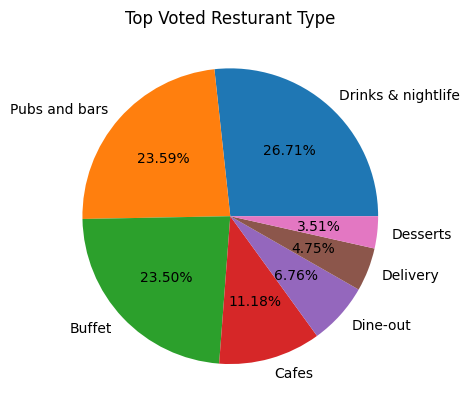

In [274]:
plt.pie(data=resturantTypeVotes, x='votes', labels=resturantTypeVotes.index, autopct='%1.2f%%')
plt.title('Top Voted Resturant Type')
plt.show()

### 3. Top rated resturants for 'Drinks & nightlife'

In [74]:
topRestForDrinkandNightlife = df[(df['listed_in(type)']=='Drinks & nightlife')]\
.groupby('name')[['rate']].mean().sort_values('rate',ascending=False)
topRestForDrinkandNightlife

,rate
name,
Byg Brewski Brewing Company,4.900000
House Of Commons,4.716667
Biergarten,4.707865
TBC Sky Lounge,4.700000
Toit,4.700000
...,...
Paprica,2.600000
The Mint Resto Bar,2.600000
Bhagini,2.500000


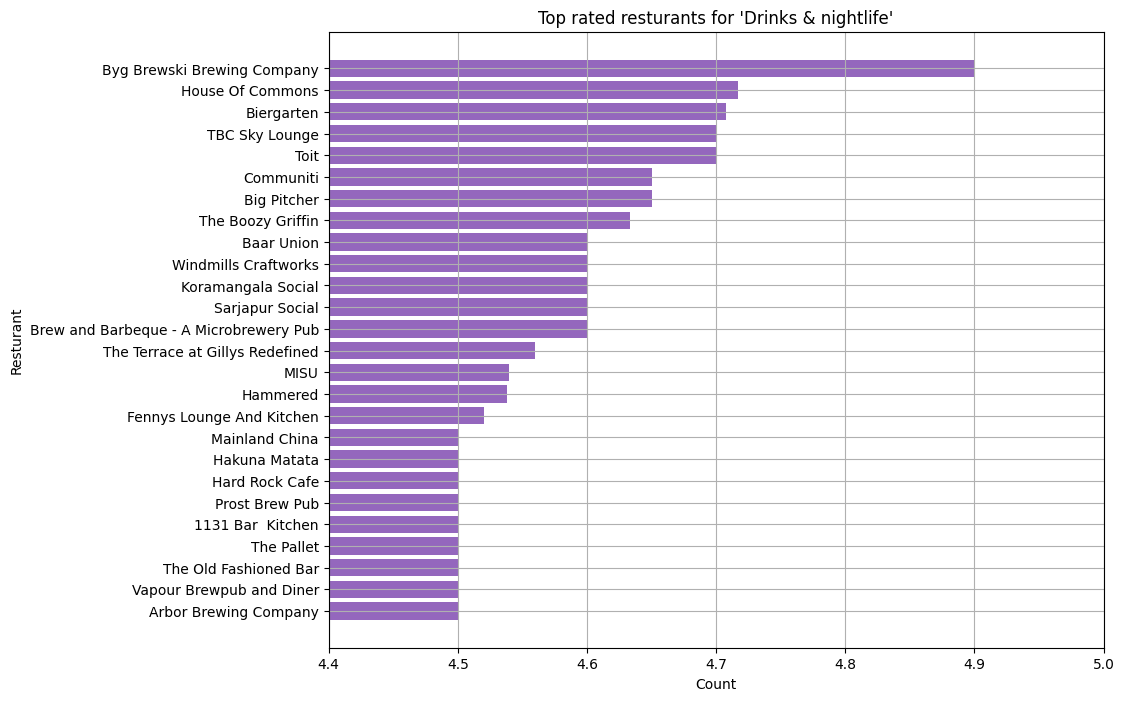

In [293]:
plt.figure(figsize=(10,8))
plt.barh(data=topRestForDrinkandNightlife[25::-1], width='rate' ,y=topRestForDrinkandNightlife[25::-1].index,color='tab:purple')
plt.title("Top rated resturants for 'Drinks & nightlife'")
plt.ylabel('Resturant')
plt.xlabel('Count')
plt.xlim((4.4,5))
plt.grid()
plt.show()

### 4. Top rated resturants for 'Pubs and bars'

In [75]:
topRestForPubsandbars = df[(df['listed_in(type)']=='Pubs and bars')]\
.groupby('name')[['rate']].mean().sort_values('rate',ascending=False)
topRestForPubsandbars

,rate
name,
Asia Kitchen By Mainland China,4.900
The Black Pearl,4.725
House Of Commons,4.725
TBC Sky Lounge,4.700
Chilis American Grill Bar,4.675
...,...
Samudra Bar Restaurant,2.900
Keys Cafe - Keys Hotel,2.800
WYT RestroPub,2.675


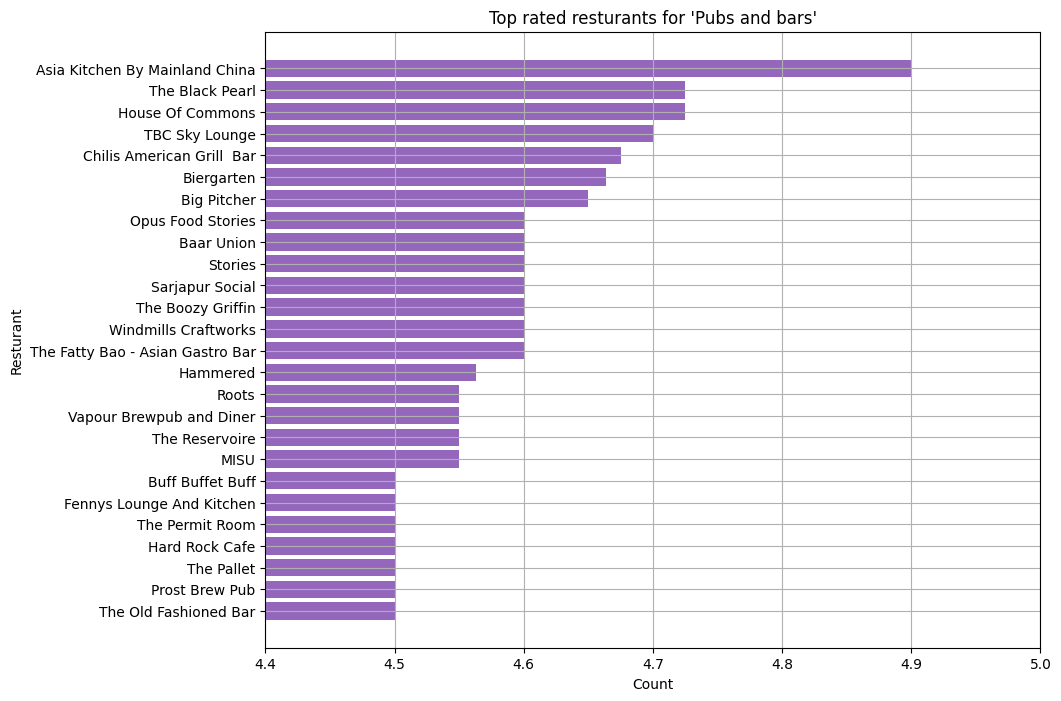

In [294]:
plt.figure(figsize=(10,8))
plt.barh(data=topRestForPubsandbars[25::-1], width='rate' ,y=topRestForPubsandbars[25::-1].index,color='tab:purple')
plt.title("Top rated resturants for 'Pubs and bars'")
plt.ylabel('Resturant')
plt.xlabel('Count')
plt.xlim((4.4,5))
plt.grid()
plt.show()

### 5. Top rated resturants for 'Buffet'

In [76]:
topRestForBuffet = df[(df['listed_in(type)']=='Buffet')]\
.groupby('name')[['rate']].mean().sort_values('rate',ascending=False)
topRestForBuffet

,rate
name,
Asia Kitchen By Mainland China,4.900000
Flechazo,4.800000
The Black Pearl,4.728571
The Big Barbeque,4.700000
Big Pitcher,4.650000
...,...
The Pavillion,2.700000
The Mint Resto Bar,2.600000
Paprica,2.600000


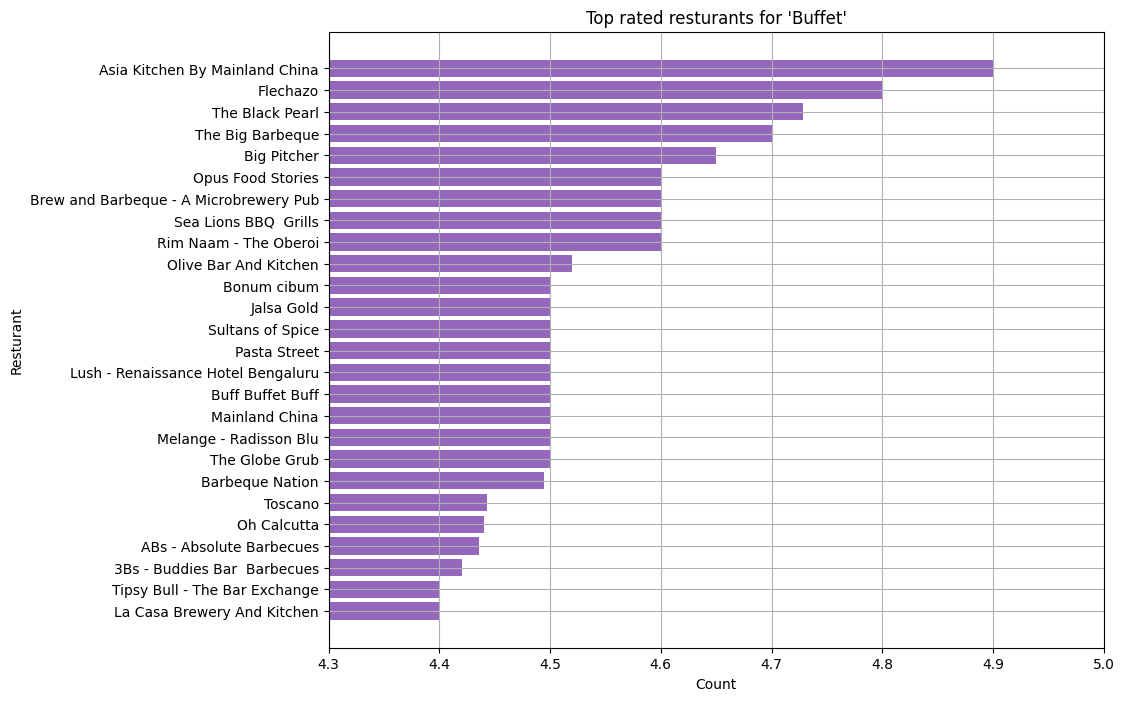

In [295]:
plt.figure(figsize=(10,8))
plt.barh(data=topRestForBuffet[25::-1], width='rate' ,y=topRestForBuffet[25::-1].index,color='tab:purple')
plt.title("Top rated resturants for 'Buffet'")
plt.ylabel('Resturant')
plt.xlabel('Count')
plt.xlim((4.3,5))
plt.grid()
plt.show()

### 6. Top rated resturants for 'Cafes'

In [77]:
topRestForCafes = df[(df['listed_in(type)']=='Cafes')]\
.groupby('name')[['rate']].mean().sort_values('rate',ascending=False)
topRestForCafes

,rate
name,
Hammered,4.657143
Lot Like Crepes,4.625000
The Blue Wagon - Kitchen,4.600000
Here Now,4.600000
The Hole in the Wall Cafe,4.600000
...,...
The Cravery,2.600000
Trippy Paradise,2.600000
Java City,2.550000


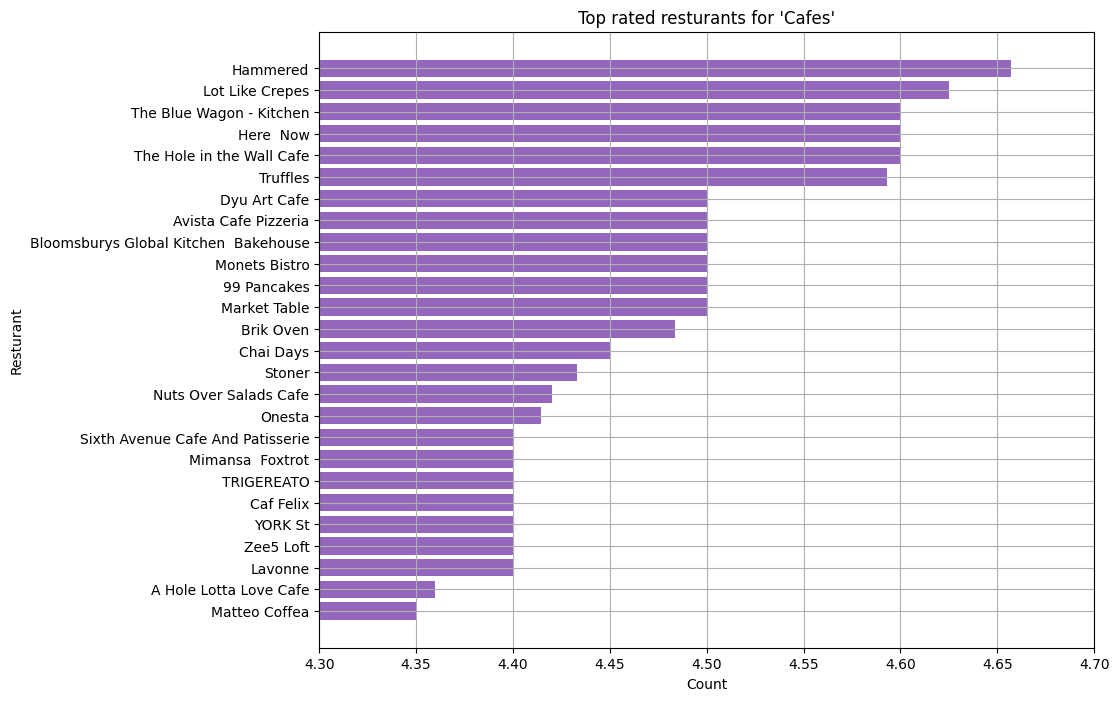

In [296]:
plt.figure(figsize=(10,8))
plt.barh(data=topRestForCafes[25::-1], width='rate' ,y=topRestForCafes[25::-1].index,color='tab:purple')
plt.title("Top rated resturants for 'Cafes'")
plt.ylabel('Resturant')
plt.xlabel('Count')
plt.xlim((4.3,4.7))
plt.grid()
plt.show()

### 7. Top rated resturants for 'Dine-out'

In [78]:
topRestForDineOut = df[(df['listed_in(type)']=='Dine-out')]\
.groupby('name')[['rate']].mean().sort_values('rate',ascending=False)
topRestForDineOut

,rate
name,
Asia Kitchen By Mainland China,4.900000
Sant Spa Cuisine,4.900000
Byg Brewski Brewing Company,4.900000
Punjab Grill,4.866667
Flechazo,4.833333
...,...
Mamma Mexicana,2.200000
Bageecha,2.150000
Deckers Lane,2.100000


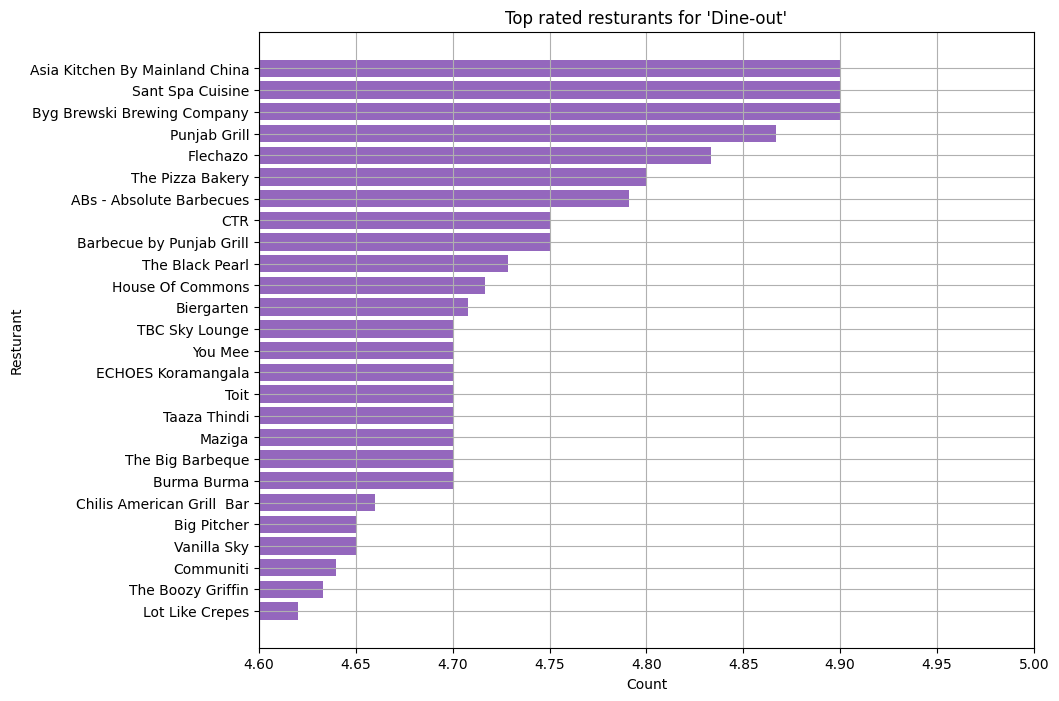

In [297]:
plt.figure(figsize=(10,8))
plt.barh(data=topRestForDineOut[25::-1], width='rate' ,y=topRestForDineOut[25::-1].index,color='tab:purple')
plt.title("Top rated resturants for 'Dine-out'")
plt.ylabel('Resturant')
plt.xlabel('Count')
plt.xlim((4.6,5))
plt.grid()
plt.show()

### 8. Top rated resturants for 'Desserts'

In [79]:
topRestForDesserts = df[(df['listed_in(type)']=='Desserts')]\
.groupby('name')[['rate']].mean().sort_values('rate',ascending=False)
topRestForDesserts

,rate
name,
Belgian Waffle Factory,4.846154
The Pizza Bakery,4.800000
OG Variar Sons,4.800000
Flechazo,4.700000
Truffles,4.700000
...,...
New Shanthi Sagar,2.800000
Food Theory,2.725000
A2B Veg - Adyar Ananda Bhavan,2.700000


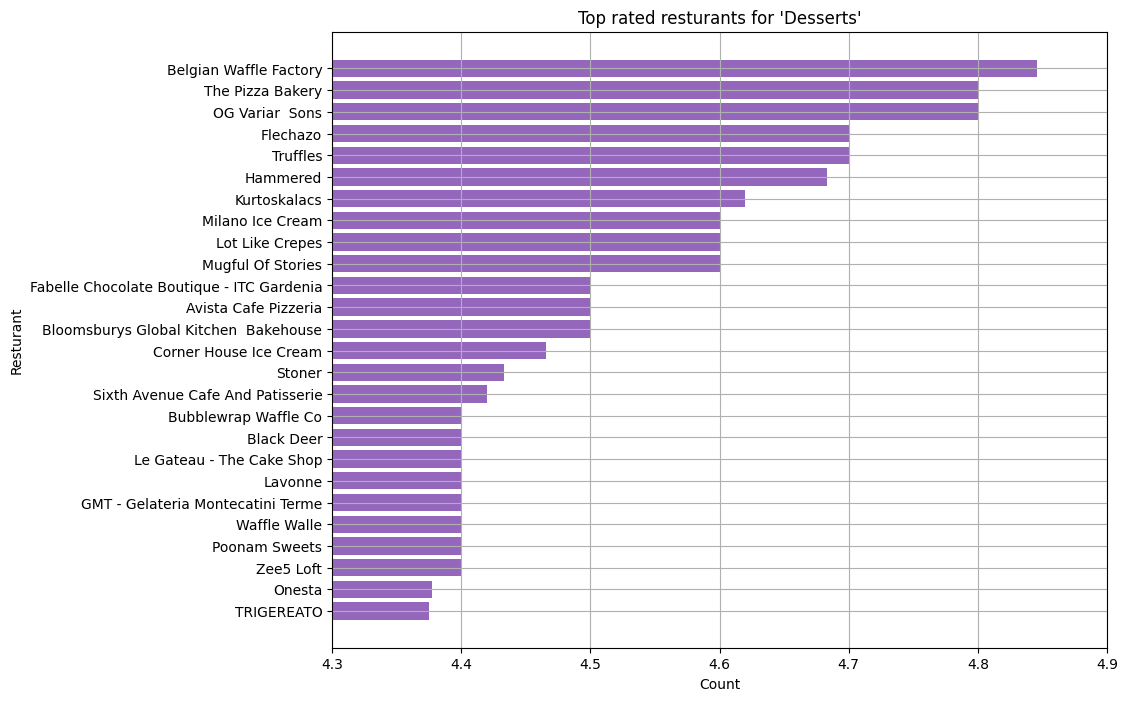

In [298]:
plt.figure(figsize=(10,8))
plt.barh(data=topRestForDesserts[25::-1], width='rate' ,y=topRestForDesserts[25::-1].index,color='tab:purple')
plt.title("Top rated resturants for 'Desserts'")
plt.ylabel('Resturant')
plt.xlabel('Count')
plt.xlim((4.3,4.9))
plt.grid()
plt.show()

### 9. Top rated resturants for 'Delivery'

In [80]:
topRestForDelivery = df[(df['listed_in(type)']=='Delivery')]\
.groupby('name')[['rate']].mean().sort_values('rate',ascending=False)
topRestForDelivery

,rate
name,
Asia Kitchen By Mainland China,4.90000
Byg Brewski Brewing Company,4.90000
Punjab Grill,4.87500
Belgian Waffle Factory,4.84375
The Pizza Bakery,4.80000
...,...
Vande Matharam,2.30000
Bhagini,2.24000
Mamma Mexicana,2.20000


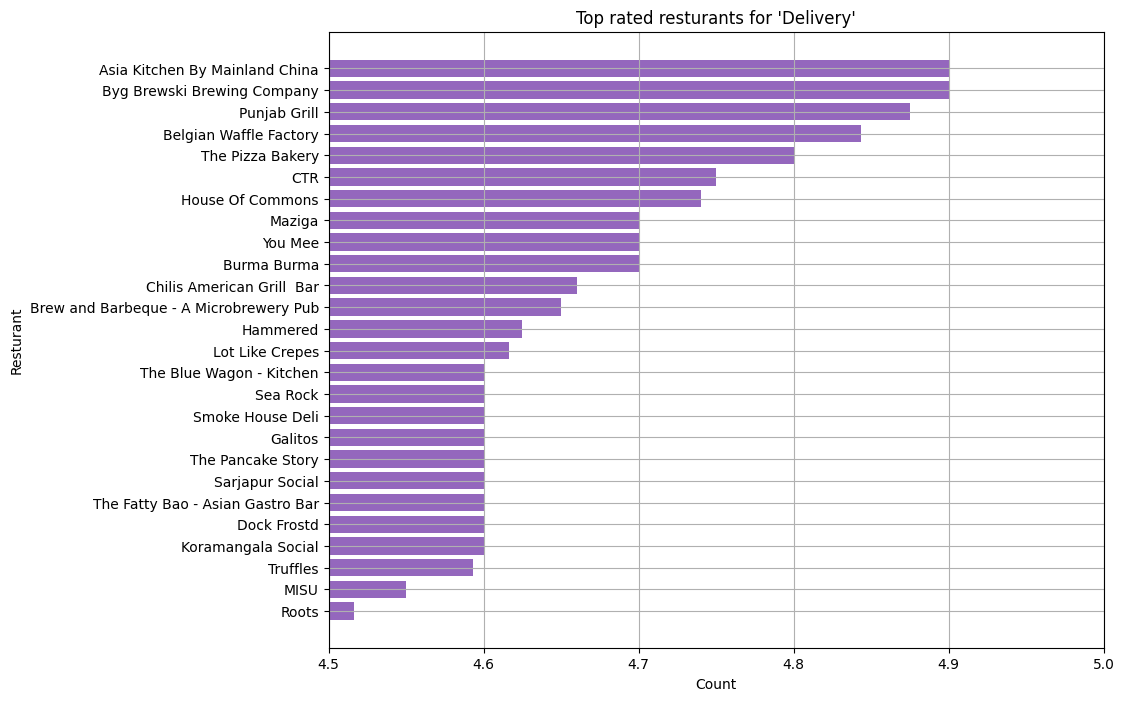

In [299]:
plt.figure(figsize=(10,8))
plt.barh(data=topRestForDelivery[25::-1], width='rate' ,y=topRestForDelivery[25::-1].index,color='tab:purple')
plt.title("Top rated resturants for 'Delivery'")
plt.ylabel('Resturant')
plt.xlabel('Count')
plt.xlim((4.5,5))
plt.grid()
plt.show()

### 10. Popular Dishes of top 50 Rated Resturants type 'Drinks & nightlife'

In [81]:
likedDishDrinksNightlife = df[
    (df['name'].isin(topRestForDrinkandNightlife[:50].index)) 
    & (df['dish_liked']!='No Info Available')
]['dish_liked'].apply(splitData)\
.explode('dish_liked')
likedDishDrinksNightlife

0         Gajar Ka Halwa
1         Chilli Chicken
2       Hara Bhara Kebab
3                Custard
4                Brownie
              ...       
4447          Craft Beer
4448          Pork Chops
4449           Mocktails
4450          Hefeweizen
4451              Nachos
Name: dish_liked, Length: 4452, dtype: object

### 11. Popular Dishes of top 50 Rated Resturants type 'Pubs and bars'

In [82]:
likedDishPubsandbars = df[
    (df['name'].isin(topRestForPubsandbars[:50].index)) 
    & (df['dish_liked']!='No Info Available')
]['dish_liked'].apply(splitData)\
.explode('dish_liked')
likedDishPubsandbars

0             Cocktails
1                 Pizza
2                 Fries
3                 Pasta
4       Chicken Sizzler
             ...       
4692          Mocktails
4693          Maki Roll
4694            Noodles
4695          Veg Sushi
4696              Momos
Name: dish_liked, Length: 4697, dtype: object

In [83]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

### 12. Popular Dishes of top 50 Rated Resturants type 'Buffet'

In [84]:
likedDishBuffet = df[
    (df['name'].isin(topRestForBuffet[:50].index)) 
    & (df['dish_liked']!='No Info Available')
]['dish_liked'].apply(splitData)\
.explode('dish_liked')
likedDishBuffet

0        Farmhouse Pizza
1       Chocolate Banana
2          Virgin Mojito
3                  Pasta
4           Paneer Tikka
              ...       
5065     Chocolate Pizza
5066       Prawn Ravioli
5067           Mocktails
5068       Potato Wedges
5069            Tiramisu
Name: dish_liked, Length: 5070, dtype: object

### 13. Popular Dishes of top 50 Rated Resturants type 'Cafes'

In [85]:
likedDishCafes = df[
    (df['name'].isin(topRestForCafes[:50].index)) 
    & (df['dish_liked']!='No Info Available')
]['dish_liked'].apply(splitData)\
.explode('dish_liked')
likedDishCafes

0                Farmhouse Pizza
1               Chocolate Banana
2                  Virgin Mojito
3                          Pasta
4                   Paneer Tikka
                  ...           
5037        Butter Chicken Pizza
5038    Peri Peri Chicken Burger
5039             Caramel Custard
5040                  Cheesecake
5041               Hot Chocolate
Name: dish_liked, Length: 5042, dtype: object

### 14. Popular Dishes of top 50 Rated Resturants type 'Desserts'

In [86]:
likedDishDesserts = df[
    (df['name'].isin(topRestForDesserts[:50].index)) 
    & (df['dish_liked']!='No Info Available')
]['dish_liked'].apply(splitData)\
.explode('dish_liked')
likedDishDesserts

0                Farmhouse Pizza
1               Chocolate Banana
2                  Virgin Mojito
3                          Pasta
4                   Paneer Tikka
                  ...           
5015        Butter Chicken Pizza
5016    Peri Peri Chicken Burger
5017             Caramel Custard
5018                  Cheesecake
5019               Hot Chocolate
Name: dish_liked, Length: 5020, dtype: object

### 15. Popular Dishes of top 50 Rated Resturants type 'Dine-out'

In [87]:
likedDishDineOut = df[
    (df['name'].isin(topRestForDineOut[:50].index)) 
    & (df['dish_liked']!='No Info Available')
]['dish_liked'].apply(splitData)\
.explode('dish_liked')
likedDishDineOut

0              Pizza
1             Nachos
2       Garlic Maggi
3            Burgers
4       Cheese Maggi
            ...     
3047      Craft Beer
3048      Pork Chops
3049       Mocktails
3050      Hefeweizen
3051          Nachos
Name: dish_liked, Length: 3052, dtype: object

### 16. Popular Dishes of top 50 Rated Resturants type 'Delivery'

In [88]:
likedDishDelivery = df[
    (df['name'].isin(topRestForDelivery[:50].index)) 
    & (df['dish_liked']!='No Info Available')
]['dish_liked'].apply(splitData)\
.explode('dish_liked')
likedDishDelivery

0       Hot Chocolate Fudge
1         Vanilla Ice Cream
2                Fudge Cake
3          Chocolate Mousse
4                     Pizza
               ...         
4617                Burgers
4618          Chicken Grill
4619          Chicken Wings
4620             Peri Fries
4621              Mocktails
Name: dish_liked, Length: 4622, dtype: object

In [89]:
mostPopDish

Pasta           3409
Burgers         3024
Cocktails       2832
Pizza           2737
Biryani         2092
                ... 
Sushi            229
Faluda           227
Fish Curry       226
Chop Suey        220
Draught Beer     220
Name: dish_liked, Length: 100, dtype: int64

In [90]:
dishLikedDf = df.copy()
dishLikedDf['dish_liked'] = dishLikedDf['dish_liked'].apply(splitData)
dishLikedDf = dishLikedDf.explode('dish_liked',ignore_index=True)

## Dish liked Count

In [358]:
dishLikedCount = dishLikedDf[dishLikedDf['dish_liked']!='No Info Available'].groupby('dish_liked')[['name']].count()\
.sort_values('name',ascending=False).rename(columns = {'name':'count'}).reset_index()
dishLikedCount

,dish_liked,count
0,Pasta,3409
1,Burgers,3024
2,Cocktails,2832
3,Pizza,2737
4,Biryani,2092
...,...,...
2787,Supreme Burger,1
2788,Doi Murgi,1
2789,Sweet Dal,1
2790,Dessert Platter,1


## Dish Liked with respect to location

In [91]:
dishAllLikedLoc = dishLikedDf[(dishLikedDf['dish_liked']!='No Info Available')]\
.groupby(['location','dish_liked'])[['name']].count().reset_index().sort_values('name', ascending=False)

In [92]:
dishAllLikedLoc[:20]

,location,dish_liked,name
7289,Koramangala 5th Block,Burgers,336
7623,Koramangala 5th Block,Pasta,284
7398,Koramangala 5th Block,Cocktails,269
7643,Koramangala 5th Block,Pizza,231
4293,Indiranagar,Cocktails,219
4625,Indiranagar,Pasta,213
291,BTM,Paratha,205
4656,Indiranagar,Pizza,204
5694,Jayanagar,Pasta,198
7794,Koramangala 6th Block,Burgers,180


In [93]:
dishLikedLocMax = dishAllLikedLoc.groupby('location')[['name']].max()

def getMostDishLikedLoc(rowData):
    global dishLikedLocMax
    loc = rowData['location']
    nameCount = rowData['name']
    if (dishLikedLocMax.loc[loc]['name']==nameCount):
        return True
    else:
        return False

dishLikedLoc = dishAllLikedLoc[dishAllLikedLoc.apply(getMostDishLikedLoc,axis=1)].sort_values('name',ascending=False)

In [94]:
dishLikedLoc[40:60]

,location,dish_liked,name
10188,Old Airport Road,Pizza,34
2693,Domlur,Pasta,34
671,Banaswadi,Biryani,34
8367,Koramangala 8th Block,Pizza,33
2461,Commercial Street,Pav Bhaji,29
10480,Rajajinagar,Mocktails,23
8437,Langford Town,Cocktails,22
8438,Langford Town,French Fries,22
8439,Langford Town,Pizza,22
6907,Koramangala 2nd Block,Cheesecake,21


## Biryani Dish Analysis

### Extract All Biryani Dish

In [95]:
biryanis = pd.Series([x for x in mostPopDish.index if 'biryani' in x.lower()])
biryanis

0               Biryani
1       Chicken Biryani
2        Mutton Biryani
3     Vegetable Biryani
4    Hyderabadi Biryani
dtype: object

### Seperate Veg and Non-Veg

In [96]:
vegBiryaniSer = pd.concat([biryanis[0:1], biryanis[3:]],ignore_index=True)
vegBiryaniSer

0               Biryani
1     Vegetable Biryani
2    Hyderabadi Biryani
dtype: object

In [97]:
nonVegBiryaniSer = pd.concat([biryanis[0:1], biryanis[1:3]],ignore_index=True)
nonVegBiryaniSer

0            Biryani
1    Chicken Biryani
2     Mutton Biryani
dtype: object

#### Biryani Rate Analysis

In [98]:
biryaniRateSer = pd.Series({
    'Veg Biryani':dishLikedDf[(dishLikedDf['dish_liked'].isin(vegBiryaniSer))]['rate'].mean(),
    'Non Veg Biryani':dishLikedDf[(dishLikedDf['dish_liked'].isin(nonVegBiryaniSer))]['rate'].mean()
})
biryaniRateSer

Veg Biryani        3.799199
Non Veg Biryani    3.789887
dtype: float64

#### Biryani Cost Analysis

In [339]:
biryaniCostSer = pd.Series({
    'Veg Biryani':dishLikedDf[(dishLikedDf['dish_liked'].isin(vegBiryaniSer))]['approx_cost(for two people)'].mean(),
    'Non-veg Biryani':dishLikedDf[(dishLikedDf['dish_liked'].isin(nonVegBiryaniSer))]['approx_cost(for two people)'].mean()
})
biryaniCostSer

Veg Biryani        799.552138
Non-veg Biryani    782.468993
dtype: float64

## Pasta Analysis

### Rate

In [100]:
pastaRateSer = pd.Series({'Pasta':dishLikedDf[(dishLikedDf['dish_liked']=='Pasta')]['rate'].mean()})
pastaRateSer

Pasta    4.043629
dtype: float64

### Cost

In [101]:
pastaCostSer = pd.Series({'Pasta':dishLikedDf[(dishLikedDf['dish_liked']=='Pasta')]['approx_cost(for two people)'].mean()})
pastaCostSer

Pasta    946.826891
dtype: float64

## Burgers Analysis

In [102]:
burger = pd.Series([x for x in mostPopDish.index if 'burger' in x.lower()])
burger

0           Burgers
1    Chicken Burger
dtype: object

### Rate

In [103]:
burgerRateSer = pd.Series({
    'Veg Burgers':dishLikedDf[(dishLikedDf['dish_liked']==burger[0])]['rate'].mean(),
    'Non-Veg Burgers':dishLikedDf[(dishLikedDf['dish_liked']==burger[1])]['rate'].mean()
})
burgerRateSer

Veg Burgers        4.000049
Non-Veg Burgers    3.915261
dtype: float64

### Cost

In [104]:
burgerCostSer = pd.Series({
    'Veg Burgers':dishLikedDf[(dishLikedDf['dish_liked']==burger[0])]['approx_cost(for two people)'].mean(),
    'Non-Veg Burgers':dishLikedDf[(dishLikedDf['dish_liked']==burger[1])]['approx_cost(for two people)'].mean()
})
burgerCostSer

Veg Burgers        776.925782
Non-Veg Burgers    700.011778
dtype: float64

## Pizza Analysis

### Rate

In [105]:
pizzaRateSer = pd.Series({'Pizza':dishLikedDf[(dishLikedDf['dish_liked']=='Pizza')]['rate'].mean()})
pizzaRateSer

Pizza    4.083408
dtype: float64

### Cost

In [106]:
pizzaCostSer = pd.Series({'Pizza':dishLikedDf[(dishLikedDf['dish_liked']=='Pizza')]['approx_cost(for two people)'].mean()})
pizzaCostSer

Pizza    1073.404008
dtype: float64

## Paratha Analysis

### Rate

In [107]:
parathaRateSer = pd.Series({'Paratha':dishLikedDf[(dishLikedDf['dish_liked']=='Paratha')]['rate'].mean()})
parathaRateSer

Paratha    3.725507
dtype: float64

### Cost

In [108]:
parathaCostSer = pd.Series({'Paratha':dishLikedDf[(dishLikedDf['dish_liked']=='Paratha')]['approx_cost(for two people)'].mean()})
parathaCostSer

Paratha    556.913155
dtype: float64

## Cocktails Analysis

### Rate

In [109]:
cocktailsRateSer = pd.Series({'Cocktails':dishLikedDf[(dishLikedDf['dish_liked']=='Cocktails')]['rate'].mean()})
cocktailsRateSer

Cocktails    4.220234
dtype: float64

### Cost

In [110]:
cocktailCostSer = pd.Series({'Cocktails':dishLikedDf[(dishLikedDf['dish_liked']=='Cocktails')]['approx_cost(for two people)'].mean()})
cocktailCostSer

Cocktails    1500.837203
dtype: float64

## Fish Analysis

### Rate

In [111]:
fish = pd.Series([x for x in mostPopDish.index if 'fish' in x.lower()])
fish

0          Fish
1    Fish Curry
dtype: object

In [112]:
fishRateSer = pd.Series({'Fish':dishLikedDf[(dishLikedDf['dish_liked'].isin(fish))]['rate'].mean()})
fishRateSer

Fish    3.972225
dtype: float64

### Cost

In [340]:
fishCostSer = pd.Series({'Fish':dishLikedDf[(dishLikedDf['dish_liked'].isin(fish))]['approx_cost(for two people)'].mean()})
fishCostSer

Fish    1054.733747
dtype: float64

## Waffles Analysis

### Rate

In [114]:
wafflesRateSer = pd.Series({'Waffles':dishLikedDf[(dishLikedDf['dish_liked']=='Waffles')]['rate'].mean()})
wafflesRateSer

Waffles    4.095385
dtype: float64

### Cost

In [115]:
wafflesCostSer = pd.Series({'Waffles':dishLikedDf[(dishLikedDf['dish_liked']=='Waffles')]['approx_cost(for two people)'].mean()})
wafflesCostSer

Waffles    690.08712
dtype: float64

## Dosa Analysis

### Rate

In [116]:
dosa = pd.Series([x for x in mostPopDish.index if 'dosa' in x.lower()])
dosa

0    Masala Dosa
1      Neer Dosa
dtype: object

In [117]:
dosaRateSer = pd.Series({'Dosa':dishLikedDf[(dishLikedDf['dish_liked'].isin(dosa))]['rate'].mean()})
dosaRateSer

Dosa    3.820655
dtype: float64

### Cost

In [118]:
dosaCostSer = pd.Series({'Dosa':dishLikedDf[(dishLikedDf['dish_liked'].isin(dosa))]['approx_cost(for two people)'].mean()})
dosaCostSer

Dosa    489.613083
dtype: float64

## Sandwiches Analysis

### Rate

In [119]:
sandwiches = pd.Series([x for x in mostPopDish.index if 'sandwich' in x.lower()])
sandwiches

0    Sandwiches
1      Sandwich
dtype: object

In [120]:
sandwichRateSer = pd.Series({'Sandwich':dishLikedDf[(dishLikedDf['dish_liked'].isin(sandwiches))]['rate'].mean()})
sandwichRateSer

Sandwich    3.92104
dtype: float64

### Cost

In [121]:
sandwichCostSer = pd.Series({'Sandwich':dishLikedDf[(dishLikedDf['dish_liked'].isin(sandwiches))]['approx_cost(for two people)'].mean()})
sandwichCostSer

Sandwich    619.018113
dtype: float64

## Pav Bhaji Analysis

### Rate

In [122]:
pavbhajiRateSer = pd.Series({'Pav Bhaji':dishLikedDf[(dishLikedDf['dish_liked']=='Pav Bhaji')]['rate'].mean()})
pavbhajiRateSer

Pav Bhaji    3.728182
dtype: float64

### Cost

In [123]:
pavbhajiCostSer = pd.Series({'Pav Bhaji':dishLikedDf[(dishLikedDf['dish_liked']=='Pav Bhaji')]['approx_cost(for two people)'].mean()})
pavbhajiCostSer

Pav Bhaji    395.294748
dtype: float64

## Mocktails Analysis

### Rate

In [124]:
mocktailRateSer = pd.Series({'Mocktails':dishLikedDf[(dishLikedDf['dish_liked']=='Mocktails')]['rate'].mean()})
mocktailRateSer

Mocktails    4.229524
dtype: float64

### Cost

In [125]:
mocktailCostSer = pd.Series({'Mocktails':dishLikedDf[(dishLikedDf['dish_liked']=='Mocktails')]['approx_cost(for two people)'].mean()})
mocktailCostSer

Mocktails    1245.264801
dtype: float64

## Noodles Analysis

### Rate

In [126]:
noodlesRateSer = pd.Series({'Noodles':dishLikedDf[(dishLikedDf['dish_liked']=='Noodles')]['rate'].mean()})
noodlesRateSer

Noodles    3.932657
dtype: float64

### Cost

In [127]:
noodlesCostSer = pd.Series({'Noodles':dishLikedDf[(dishLikedDf['dish_liked']=='Noodles')]['approx_cost(for two people)'].mean()})
noodlesCostSer

Noodles    834.554693
dtype: float64

## Coffee Analysis

In [128]:
coffee = pd.Series([x for x in mostPopDish.index if 'coffee' in x.lower()])
coffee

0           Coffee
1    Filter Coffee
dtype: object

### Rate

In [129]:
coffeeRateSer = pd.Series({'Coffee':dishLikedDf[(dishLikedDf['dish_liked'].isin(coffee))]['rate'].mean()})
coffeeRateSer

Coffee    3.872853
dtype: float64

### Cost

In [130]:
coffeeCostSer = pd.Series({'Coffee':dishLikedDf[(dishLikedDf['dish_liked'].isin(coffee))]['approx_cost(for two people)'].mean()})
coffeeCostSer

Coffee    551.87615
dtype: float64

In [357]:
dishCostList = [
    biryaniCostSer,
    pastaCostSer,
    burgerCostSer,
    pizzaCostSer,
    parathaCostSer,
    cocktailCostSer,
    fishCostSer,
    wafflesCostSer,
    dosaCostSer,
    sandwichCostSer,
    pavbhajiCostSer,
    mocktailCostSer,
    noodlesCostSer,
    coffeeCostSer
]

dishCostSer = pd.concat(dishCostList)
dishCostSer

Veg Biryani         799.552138
Non-veg Biryani     782.468993
Pasta               946.826891
Veg Burgers         776.925782
Non-Veg Burgers     700.011778
Fish               1054.733747
Paratha             556.913155
Cocktails          1500.837203
Fish               1054.733747
Waffles             690.087120
Dosa                489.613083
Sandwich            619.018113
Pav Bhaji           395.294748
Mocktails          1245.264801
Noodles             834.554693
Coffee              551.876150
dtype: float64

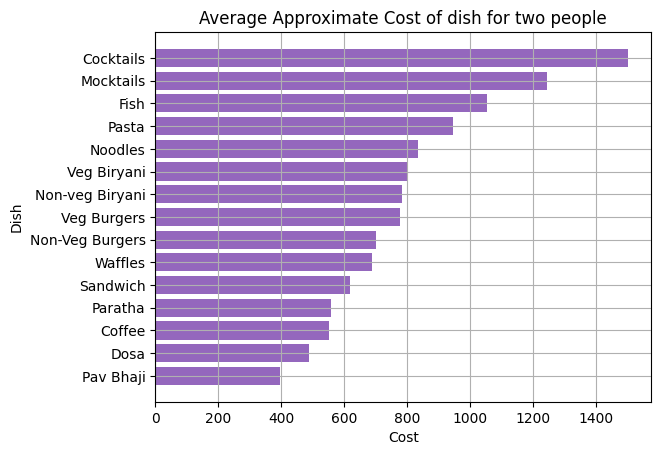

In [356]:
plt.barh(y=dishCostSer.index,width=dishCostSer,color='tab:purple')
plt.title('Average Approximate Cost of dish for two people')
plt.ylabel('Dish')
plt.xlabel('Cost')
plt.grid()
plt.show()

In [131]:
import matplotlib.pyplot as plt

In [132]:
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),Rest_class
0,Jalsa,Yes,Yes,4.100,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Mid Class
1,Spice Elephant,Yes,No,4.100,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Mid Class
2,San Churro Cafe,Yes,No,3.800,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Mid Class
3,Addhuri Udupi Bhojana,No,No,3.700,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Mid Class
4,Grand Village,No,No,3.800,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Mid Class
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru,No,No,3.600,27,Whitefield,Bar,No Info Available,Continental,1500.0,Pubs and bars,High Class
51713,Vinod Bar And Restaurant,No,No,3.972,0,Whitefield,Bar,No Info Available,Finger Food,600.0,Pubs and bars,Mid Class
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.972,0,Whitefield,Bar,No Info Available,Finger Food,2000.0,Pubs and bars,High Class
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars,High Class


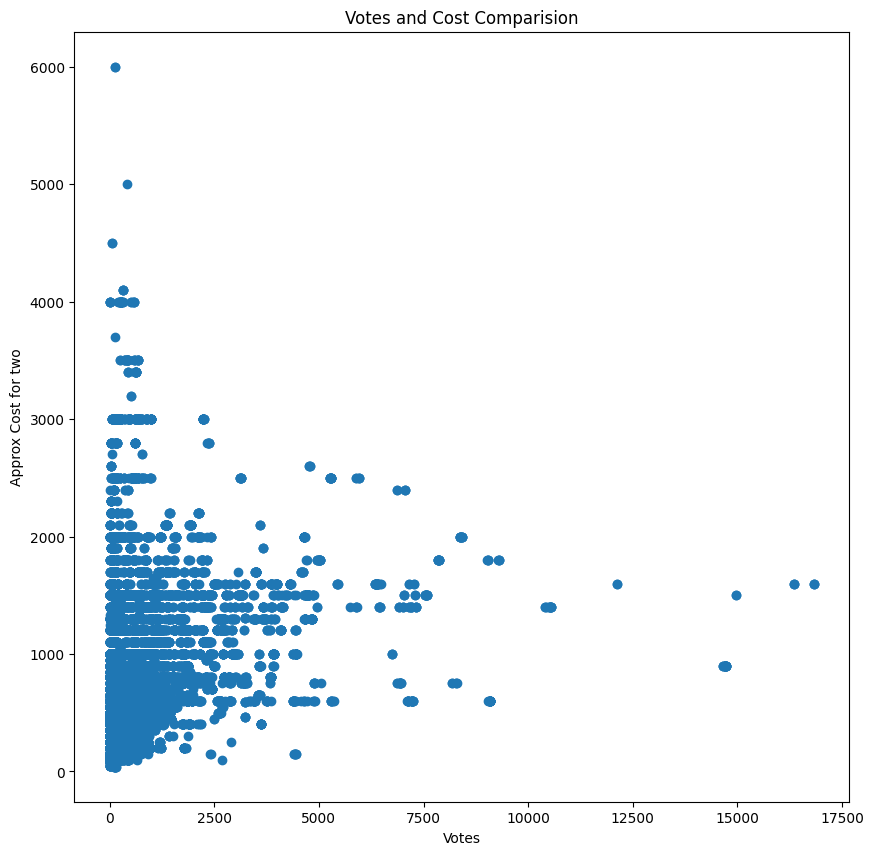

In [304]:
plt.figure(figsize=(10,10))
plt.scatter(data=df,x='votes',y='approx_cost(for two people)')
plt.title('Votes and Cost Comparision')
plt.xlabel('Votes')
plt.ylabel('Approx Cost for two')
plt.show()

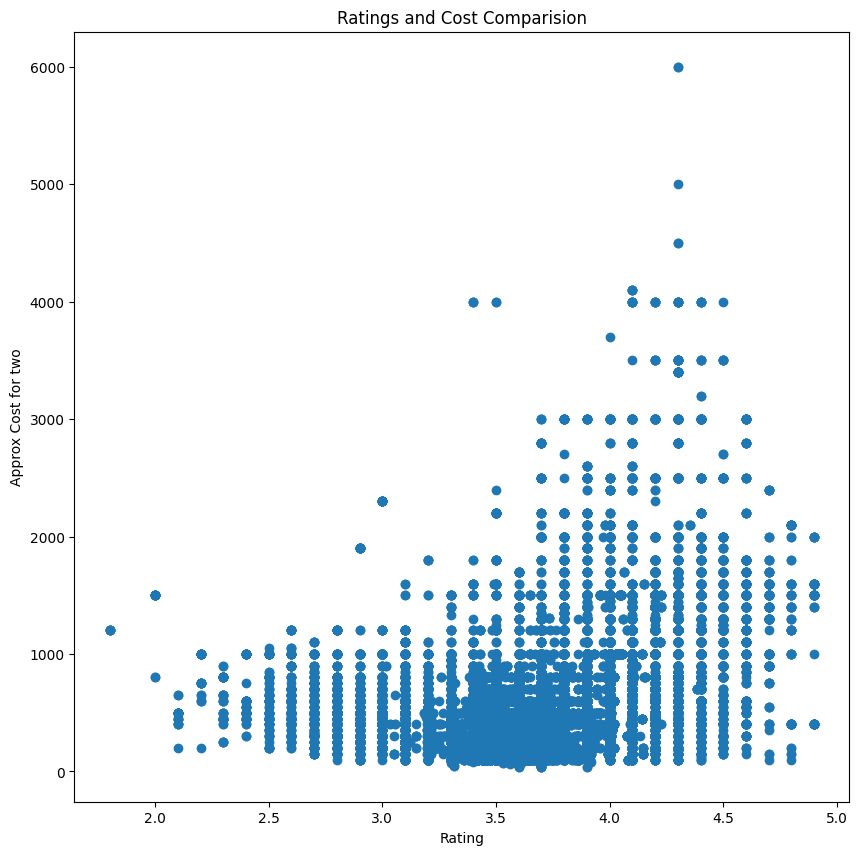

In [324]:
plt.figure(figsize=(10,10))
plt.scatter(data=df,x='rate',y='approx_cost(for two people)')
plt.title('Ratings and Cost Comparision')
plt.xlabel('Rating')
plt.ylabel('Approx Cost for two')
plt.show()

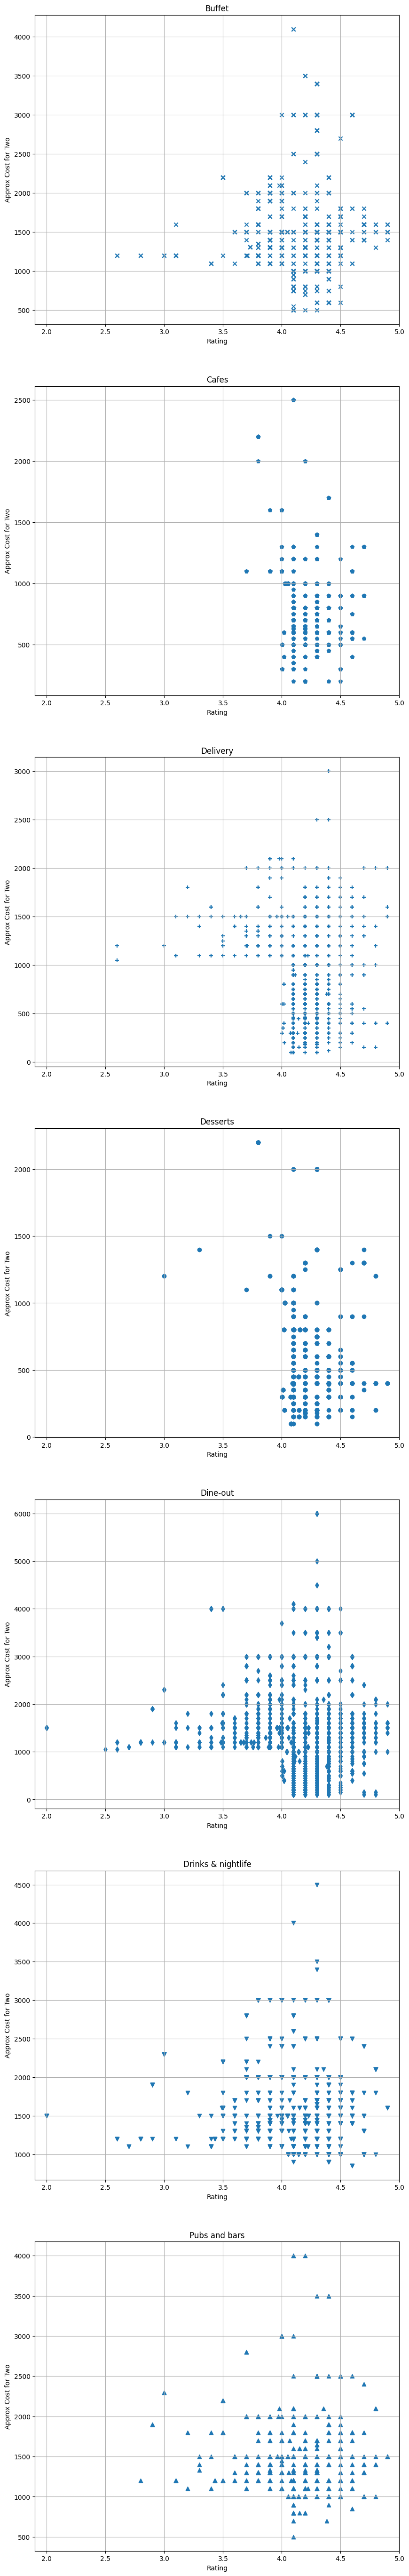

In [325]:
tempDf = df[(df['rate']>4) | (df['approx_cost(for two people)']>1000)]
plt.figure(figsize=(10,70))
cat = df['listed_in(type)'].unique()
marker = ['x','p','+','o','d','v','^']
axList = [plt.subplot(7,1,x) for x in range(1,8)]
for catog, mark, ax in zip(cat,marker,axList):
    ax.scatter(data=tempDf[tempDf['listed_in(type)']==catog],x='rate',y='approx_cost(for two people)',marker=mark,)
    ax.set_title(catog)
    ax.set_xlabel('Rating')
    ax.set_ylabel('Approx Cost for Two')
    ax.set_xlim((1.9,5))
    ax.grid()
plt.show()

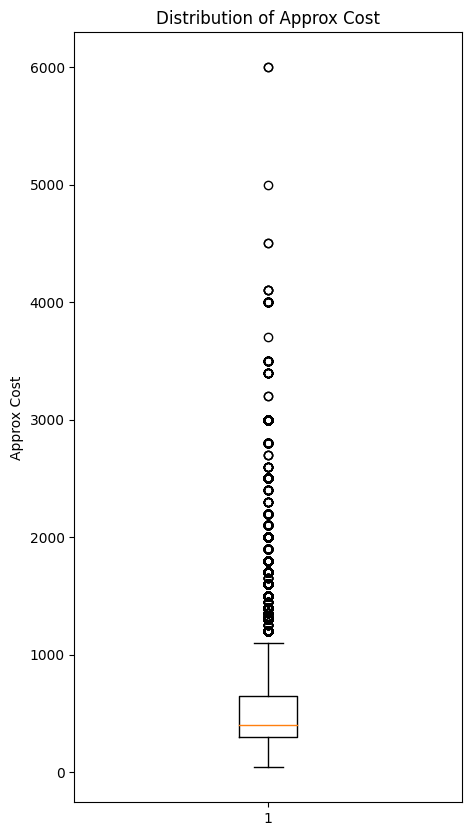

In [336]:
plt.figure(figsize=(5,10))
plt.boxplot(data=df, x='approx_cost(for two people)')
plt.title('Distribution of Approx Cost')
plt.ylabel('Approx Cost')
# plt.xlabel()
plt.show()

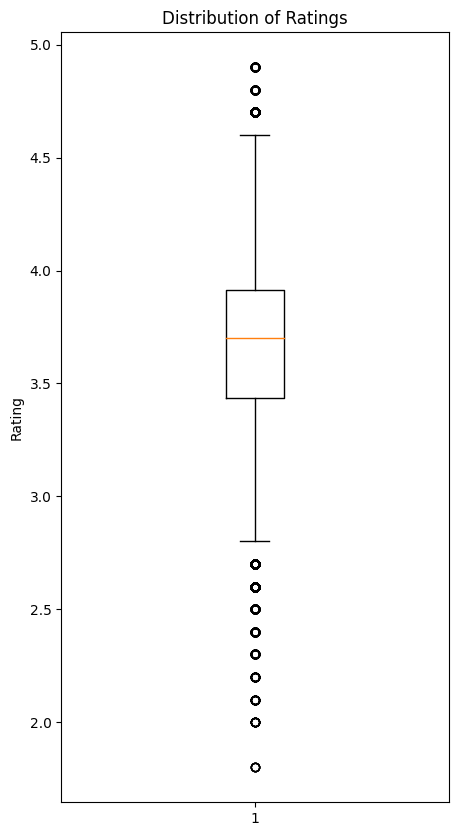

In [337]:
plt.figure(figsize=(5,10))
plt.boxplot(data=df, x='rate')
plt.title('Distribution of Ratings')
plt.ylabel('Rating')
# plt.xlabel()
plt.show()